# CIS4930 : Student Depression Prediction
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score
from imblearn.over_sampling import SMOTE

## Data Exploration

In [2]:
depression_df = pd.read_csv('student_depression_prediction.csv')
display(depression_df.head())
display(depression_df.tail())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [3]:
display(depression_df.info())
display(depression_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

None

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [4]:
# Check for missing values
null_entries = depression_df.isnull().sum()
print("Number of Nan:")
display(null_entries)

# Check for duplicates
num_duplicates = depression_df.duplicated().sum() # Sums duplicated entries
print("Number of duplicate values: ", num_duplicates)

Number of Nan:


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Number of duplicate values:  0


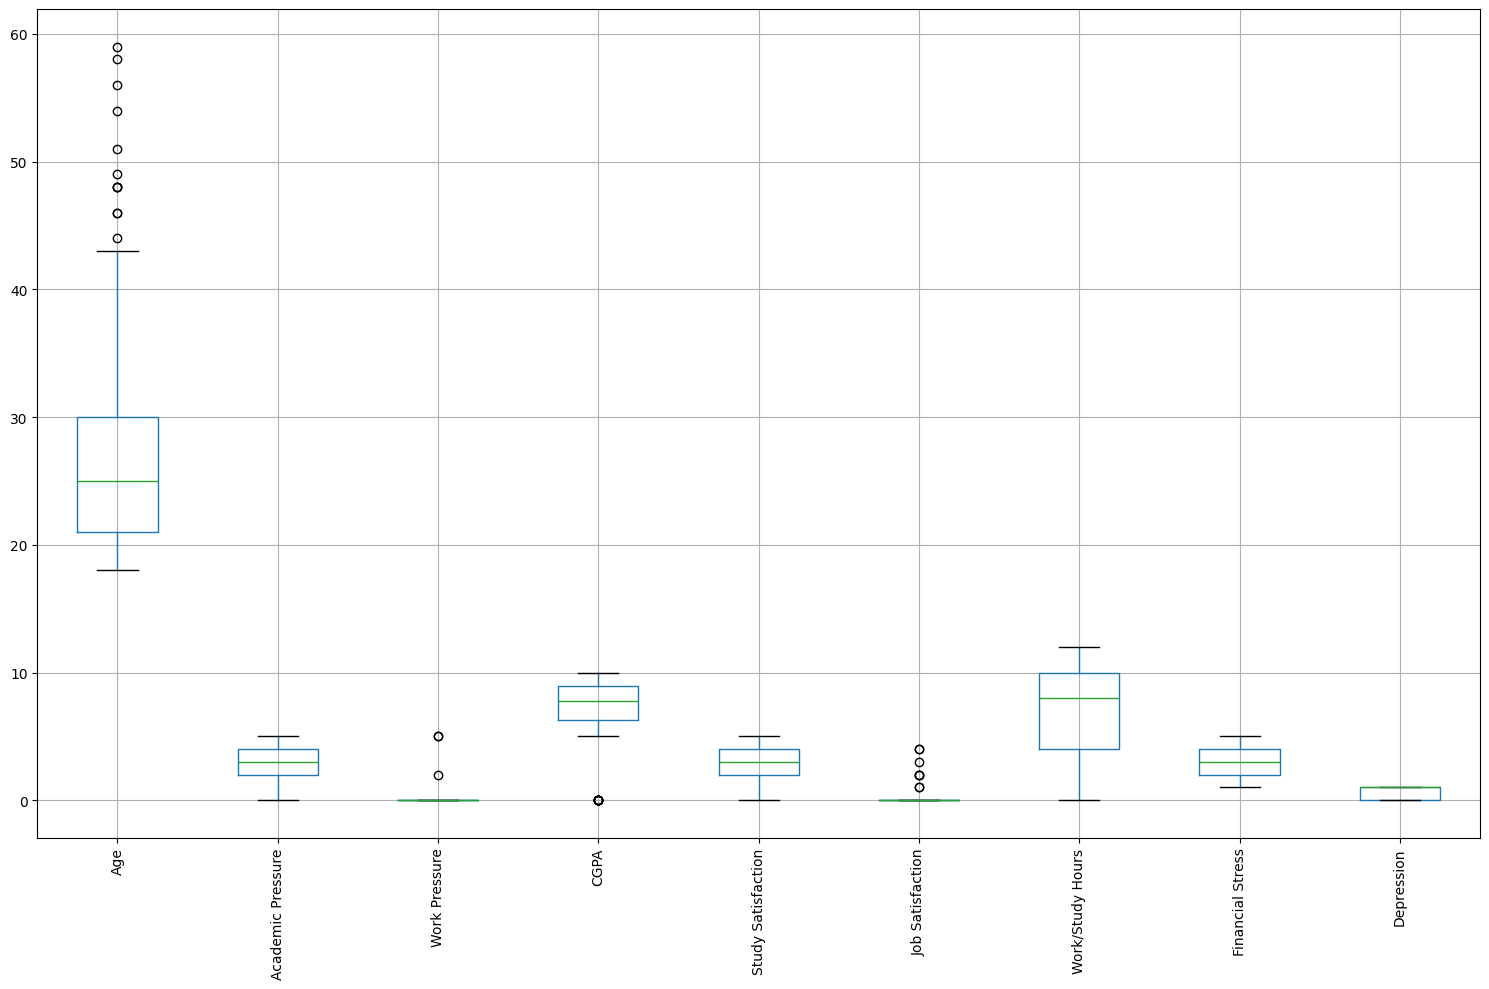

In [5]:
plt.figure(figsize=(15, 10))
depression_df.drop(["id"], axis=1).boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

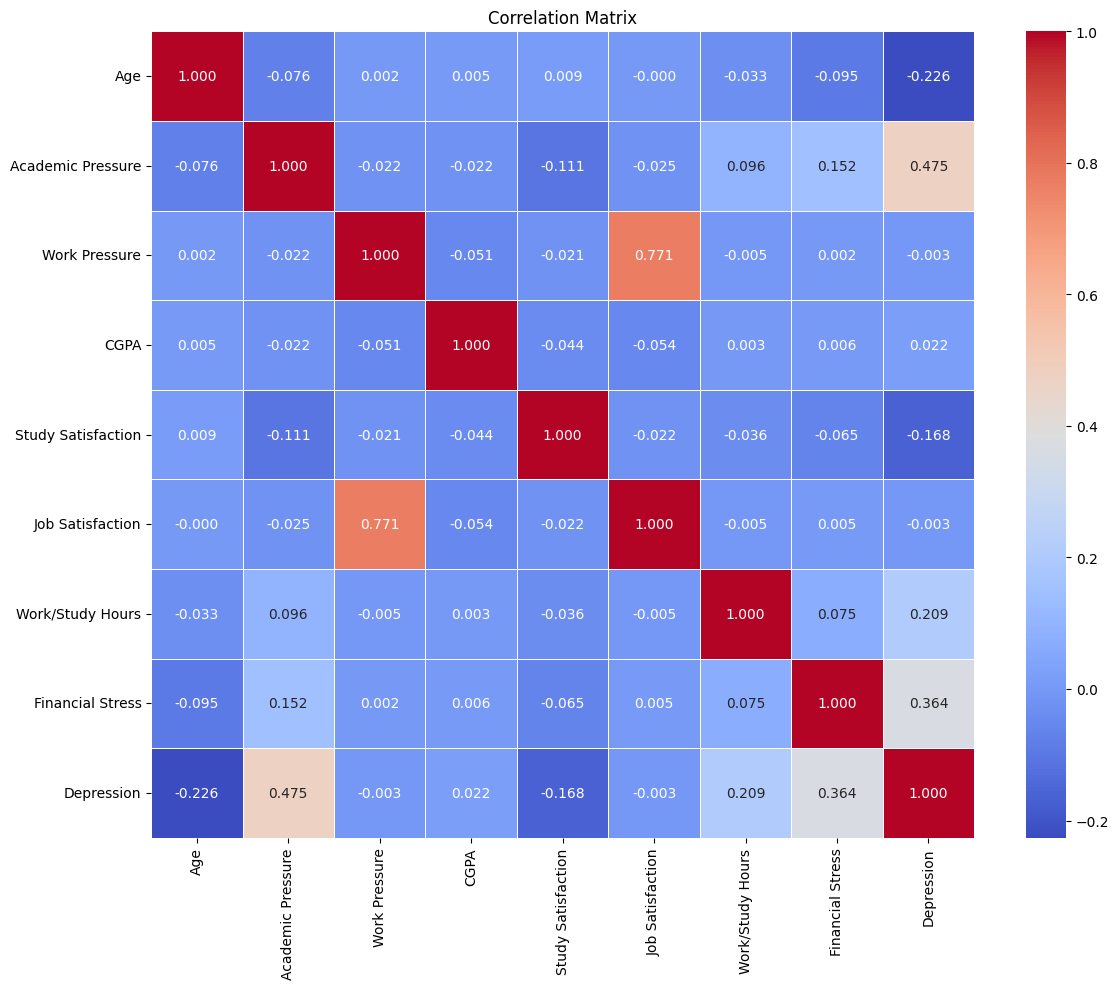

In [6]:
numerical_df = depression_df.select_dtypes(include=[np.number]).drop(columns=['id'], axis=1)

plt.figure(figsize=(12, 10))
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

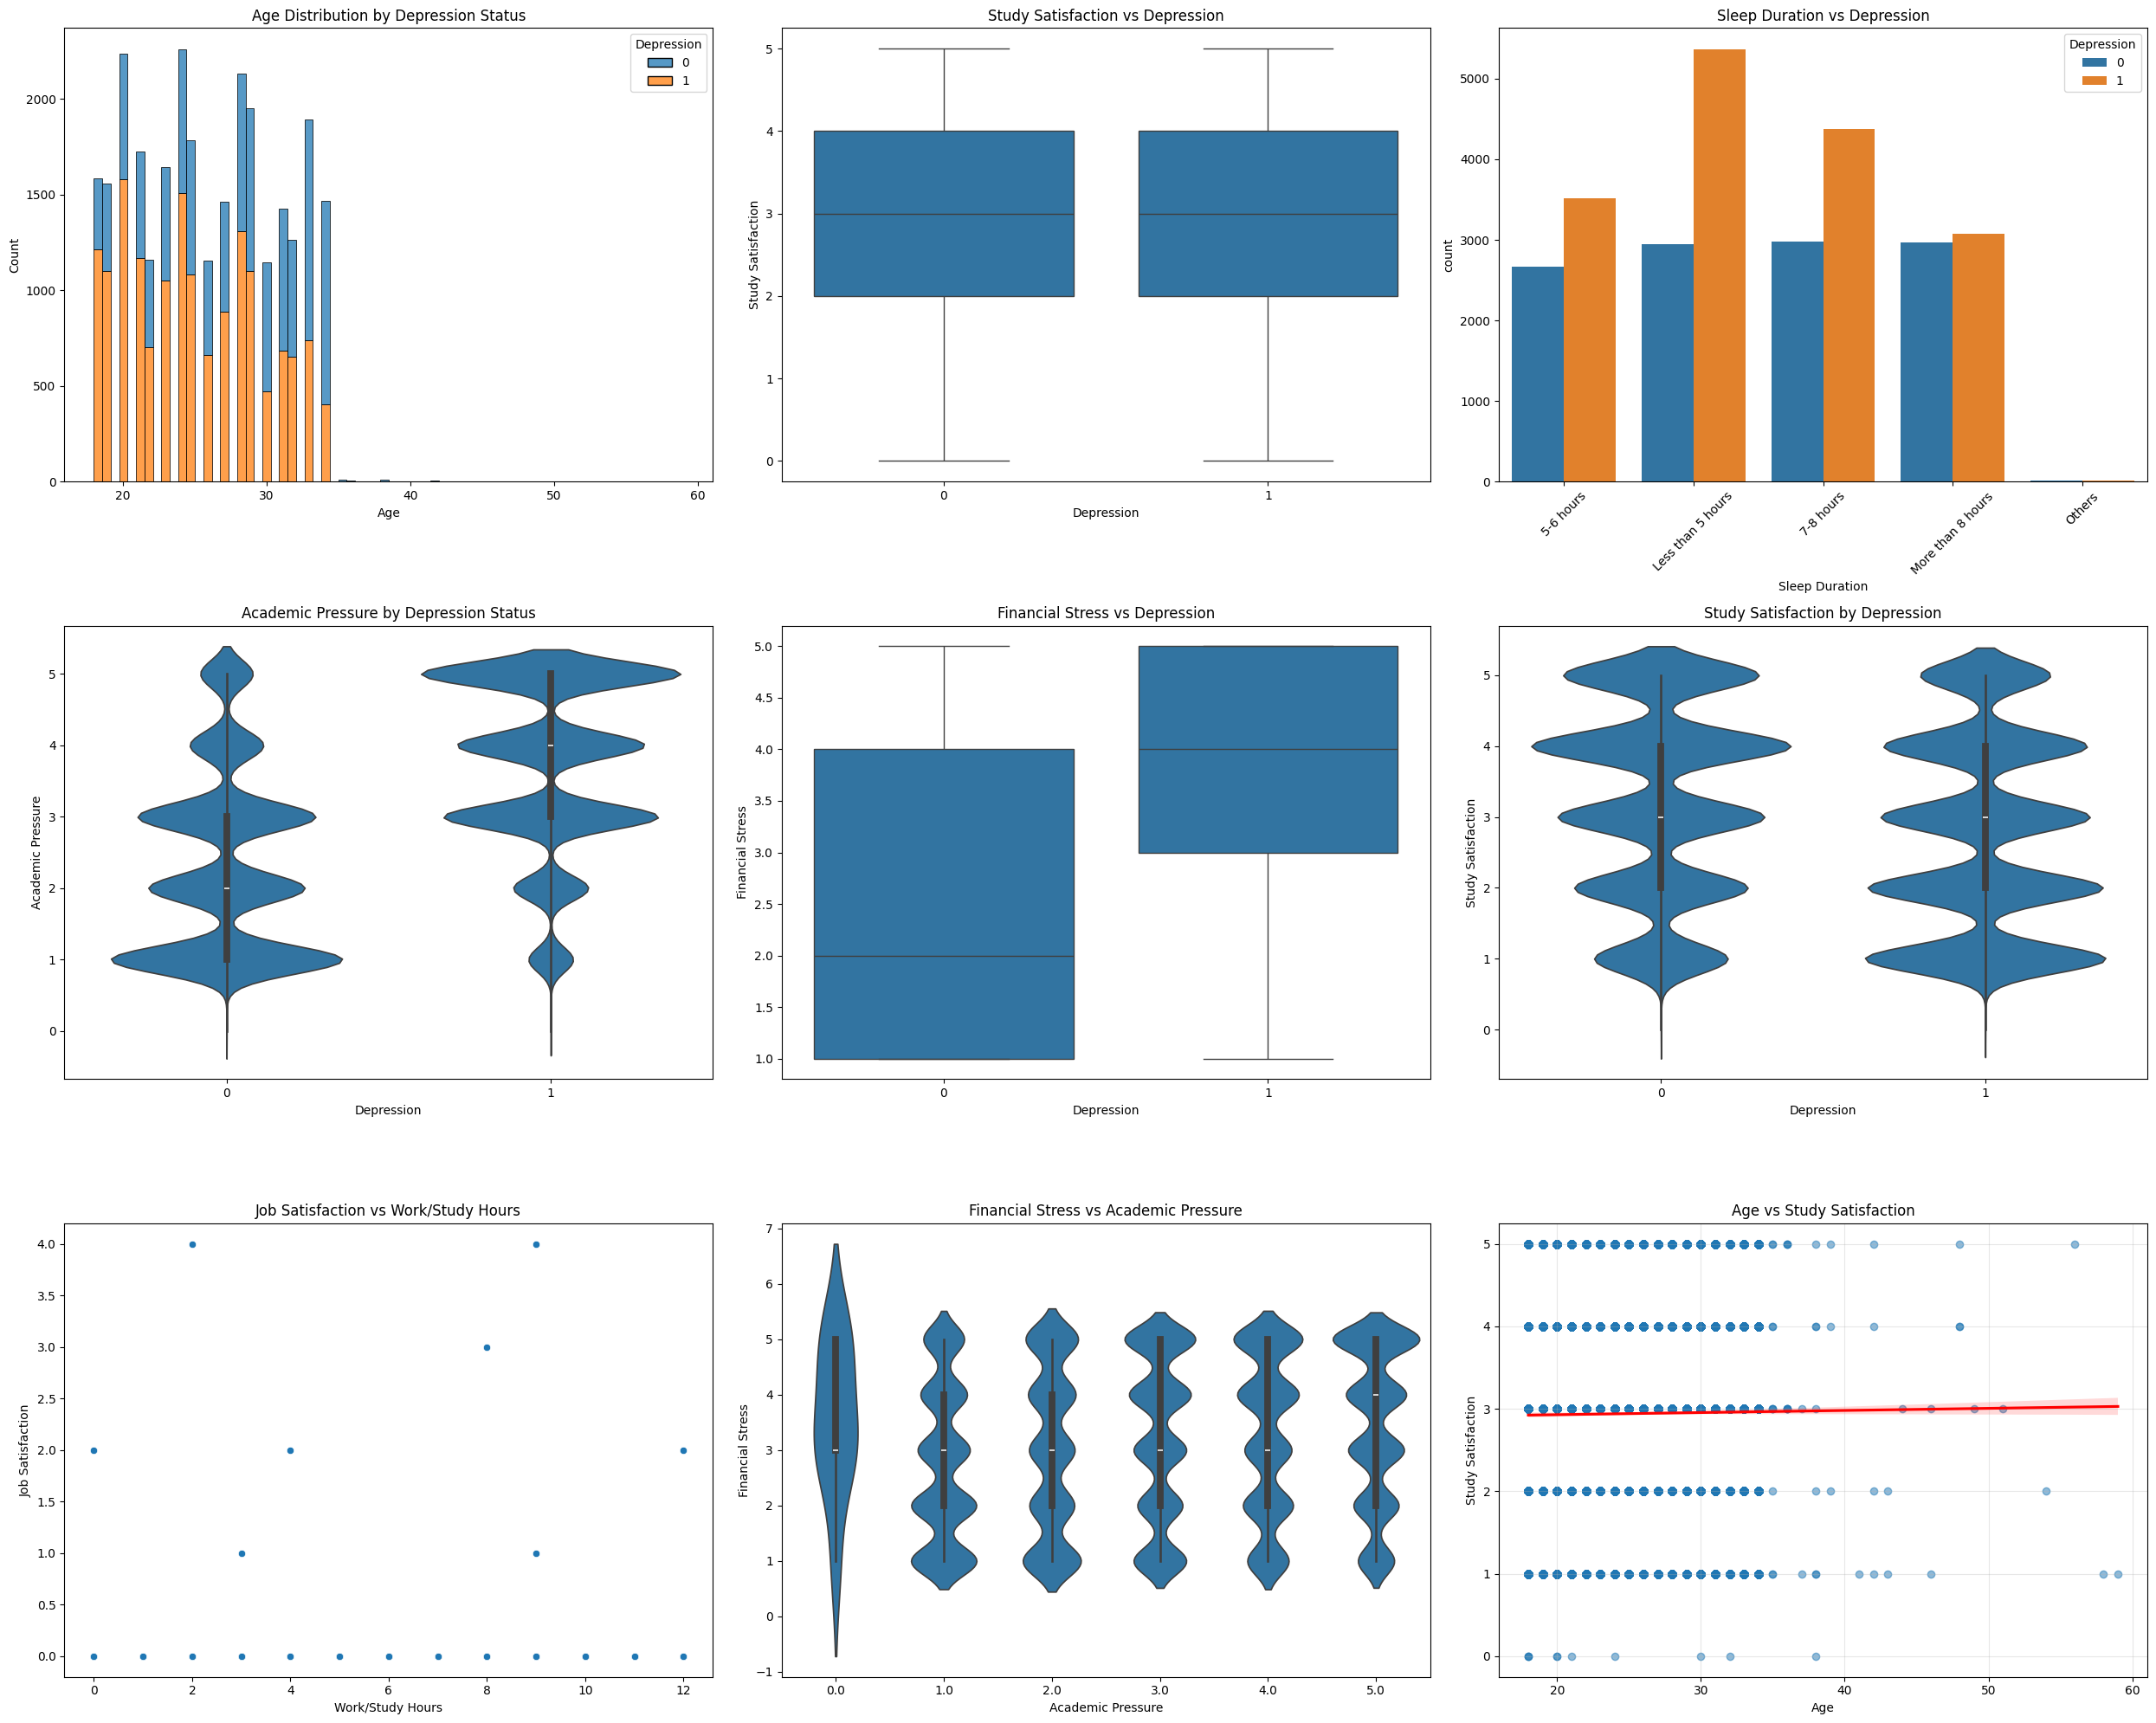

In [7]:
# Create 6 different plots to explore the data
fig, axes = plt.subplots(3, 3, figsize=(25, 20))

# 1. Distribution of age by depression status
sns.histplot(data=depression_df, x='Age', hue='Depression', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Depression Status')

# 2. Relationship between Study Satisfaction and Depression
sns.boxplot(data=depression_df, x='Depression', y='Study Satisfaction', ax=axes[0, 1])
axes[0, 1].set_title('Study Satisfaction vs Depression')

# 3. Sleep Duration vs Depression
sns.countplot(data=depression_df, x='Sleep Duration', hue='Depression', ax=axes[0, 2])
axes[0, 2].set_title('Sleep Duration vs Depression')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Academic Pressure by Depression Status
sns.violinplot(data=depression_df, x='Depression', y='Academic Pressure', ax=axes[1, 0])
axes[1, 0].set_title('Academic Pressure by Depression Status')

# 5. Financial Stress vs Depression
sns.boxplot(data=depression_df, x='Depression', y='Financial Stress', ax=axes[1, 1])
axes[1, 1].set_title('Financial Stress vs Depression')

# 6. Depression rate by Gender and Family History
sns.violinplot(data=depression_df, x='Depression', y='Study Satisfaction', ax=axes[1, 2])
axes[1, 2].set_title('Study Satisfaction by Depression')

# 7. Work/Study Hours vs Depression
sns.scatterplot(data=depression_df, x='Work/Study Hours', y='Job Satisfaction', ax=axes[2, 0])
axes[2, 0].set_title('Job Satisfaction vs Work/Study Hours')
plt.grid(True, alpha=0.3)

# 8. Study Satisfaction vs Financial Stress
sns.violinplot(data=depression_df, x='Academic Pressure', y='Financial Stress', ax=axes[2, 1])
axes[2, 1].set_title('Financial Stress vs Academic Pressure')
plt.grid(True, alpha=0.3)

# 9. Age vs Study Satisfaction
sns.regplot(data=depression_df, x='Age', y='Study Satisfaction', scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[2, 2])
axes[2, 2].set_title('Age vs Study Satisfaction')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Correlation Modeling

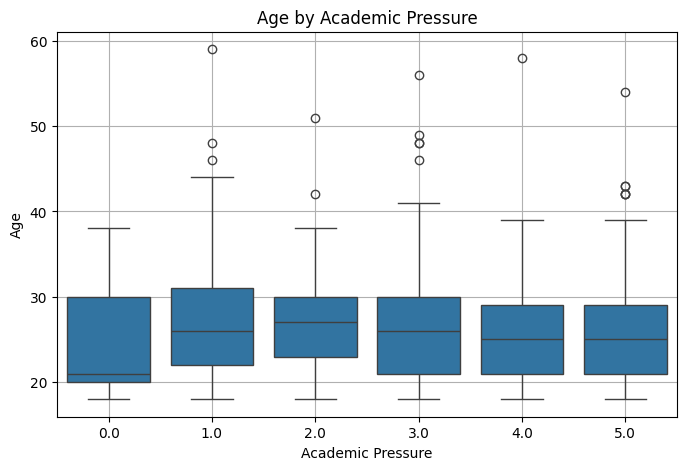

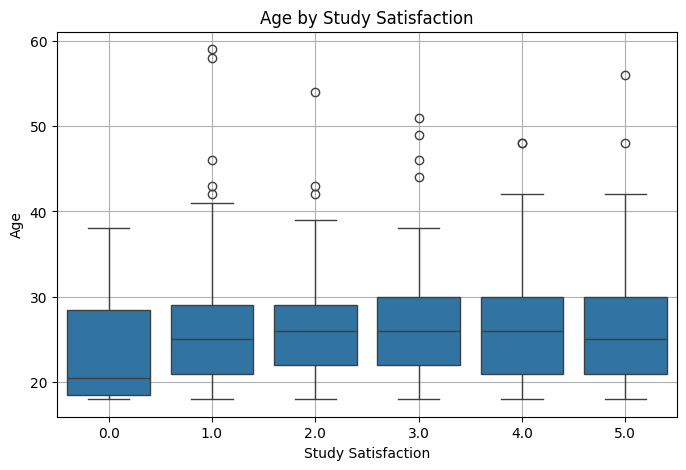

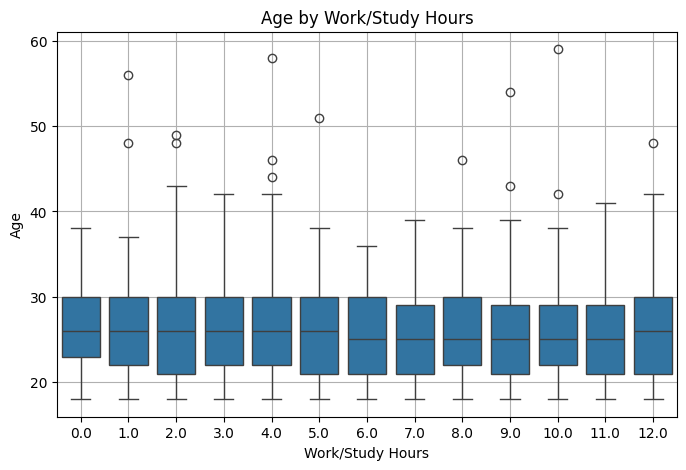

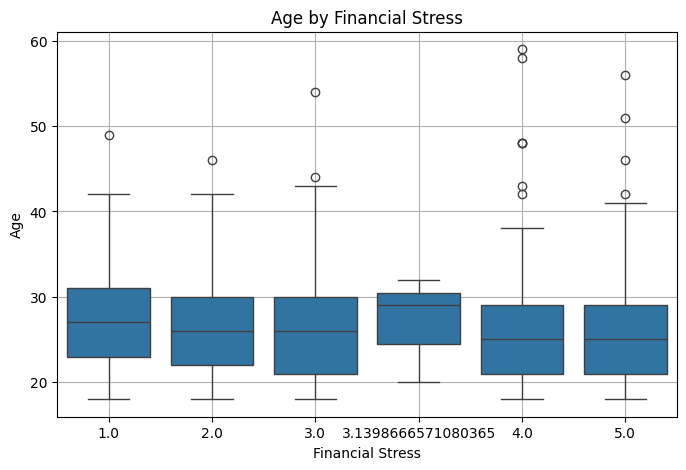

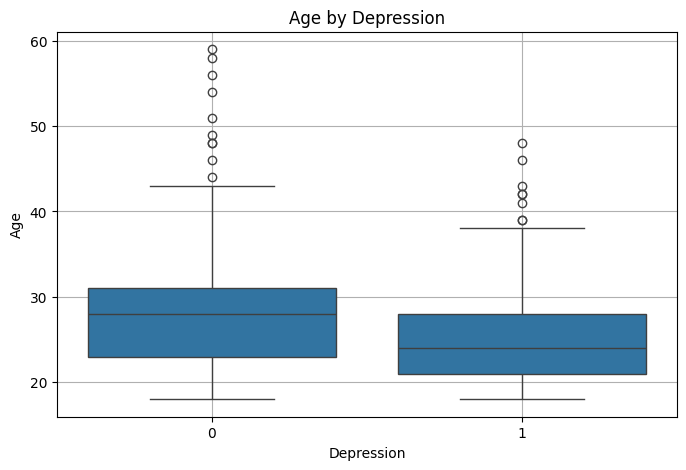

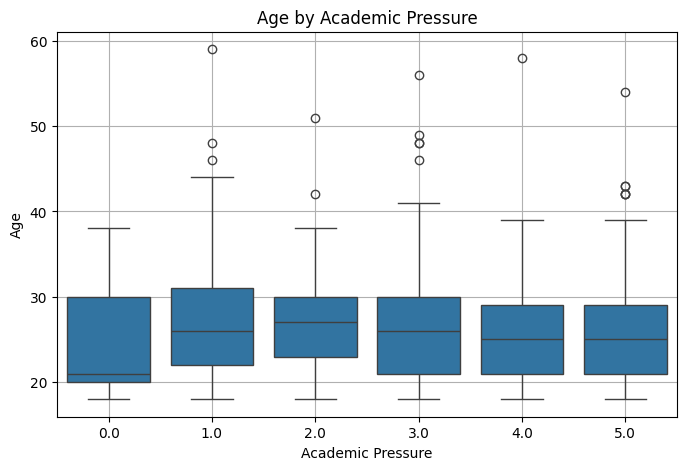

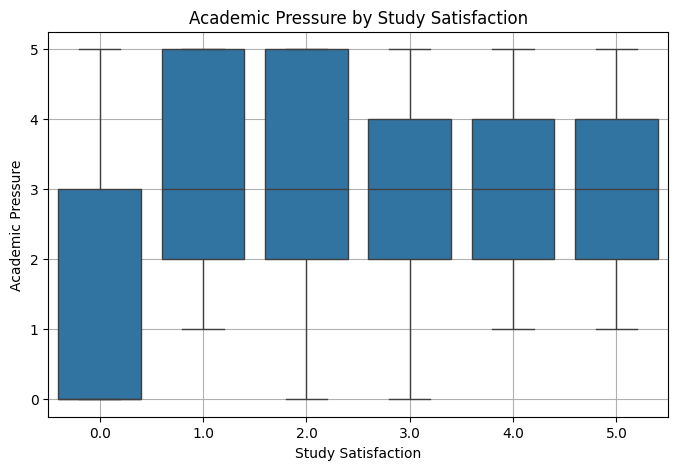

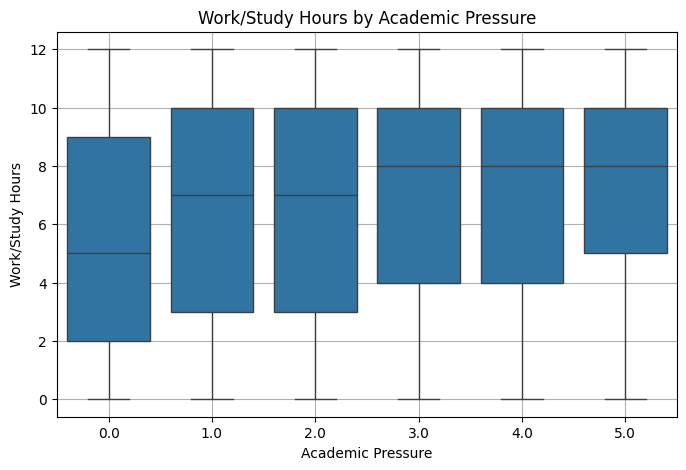

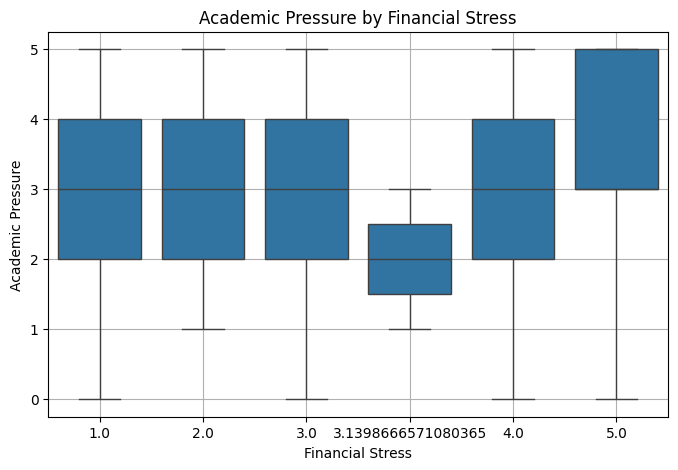

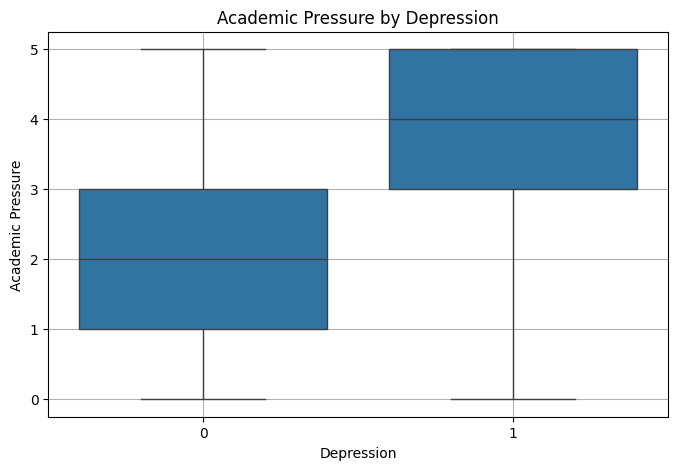

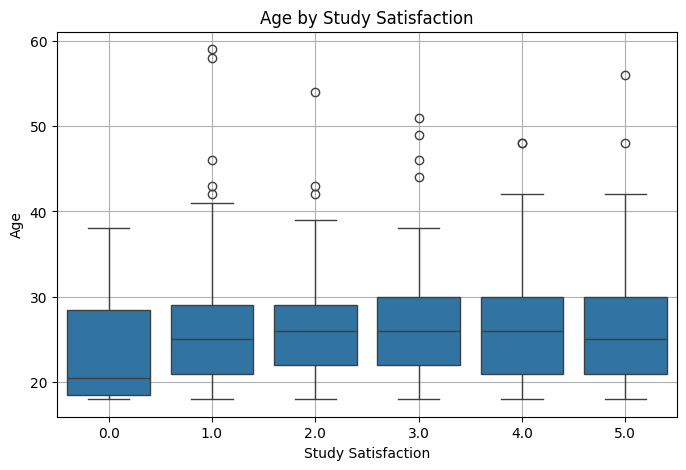

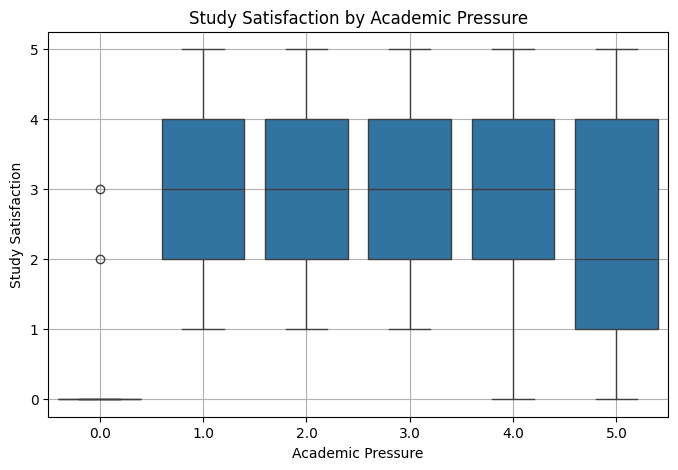

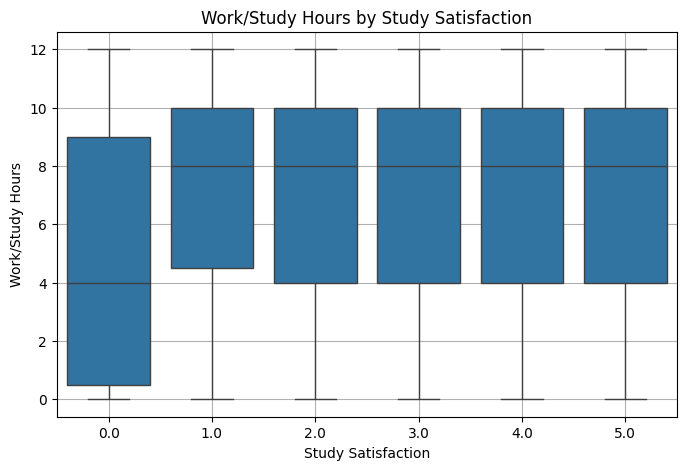

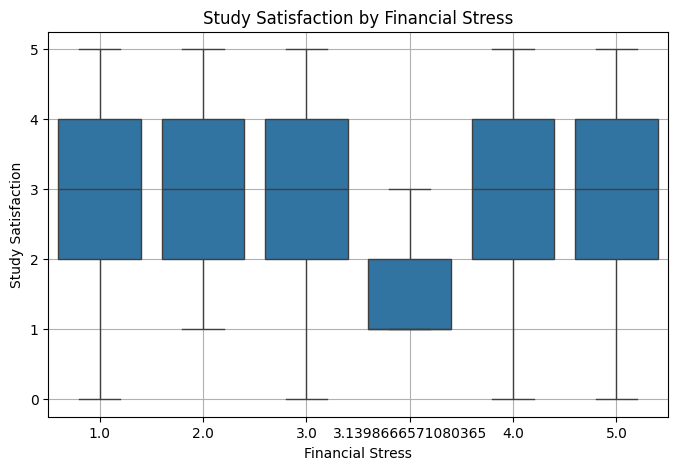

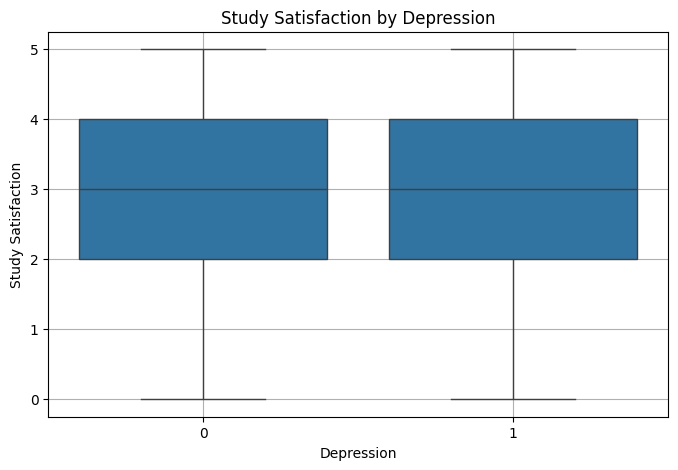

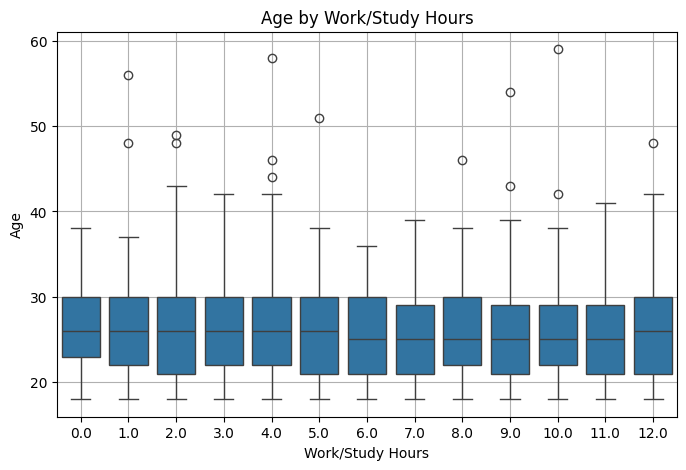

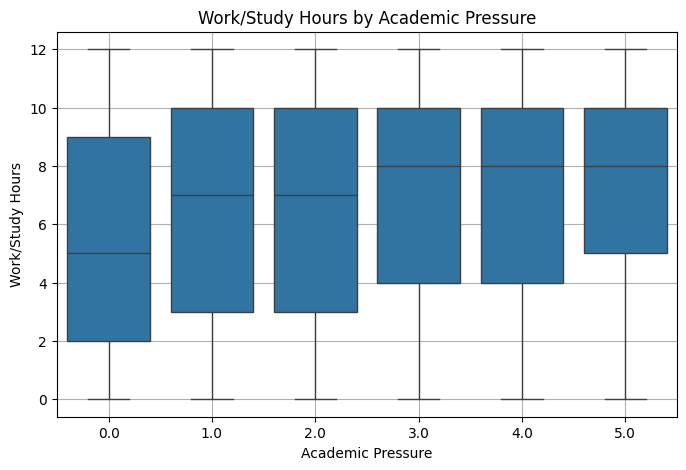

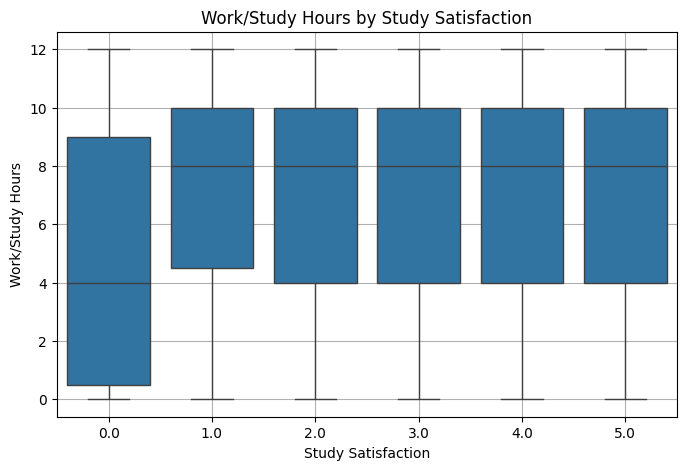

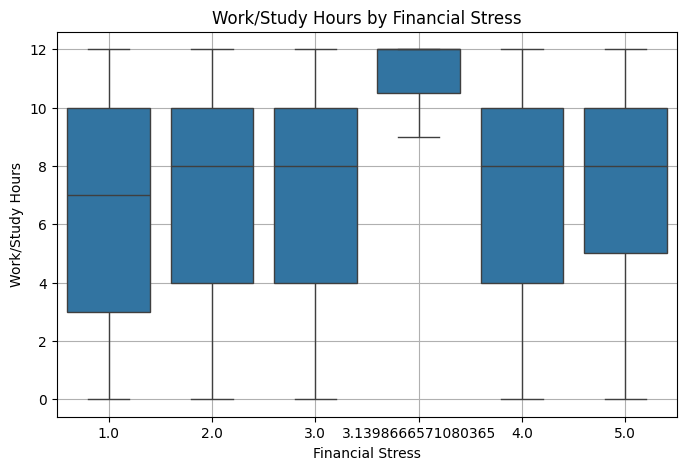

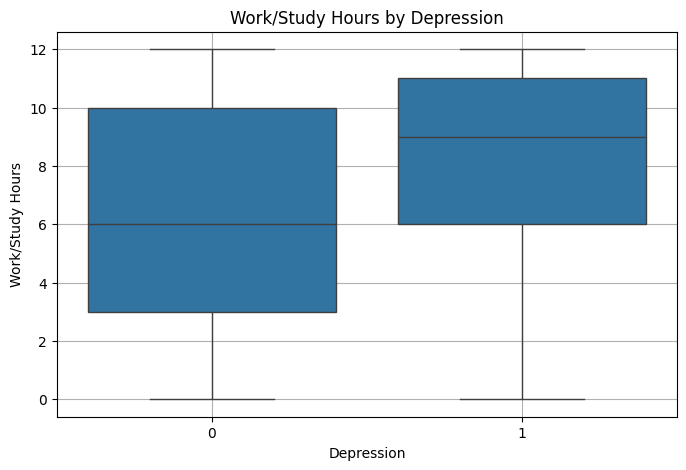

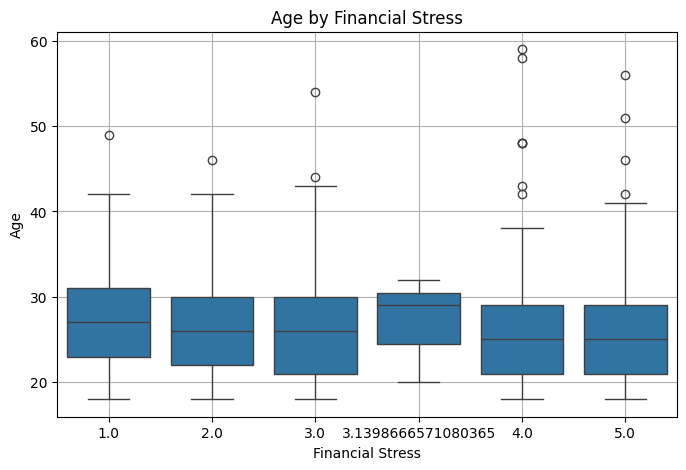

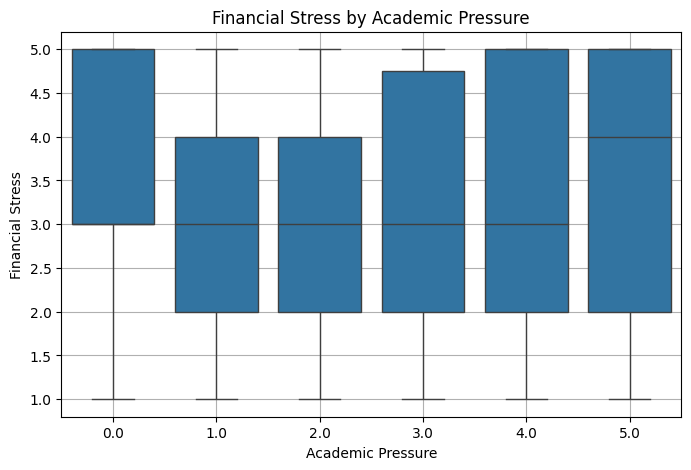

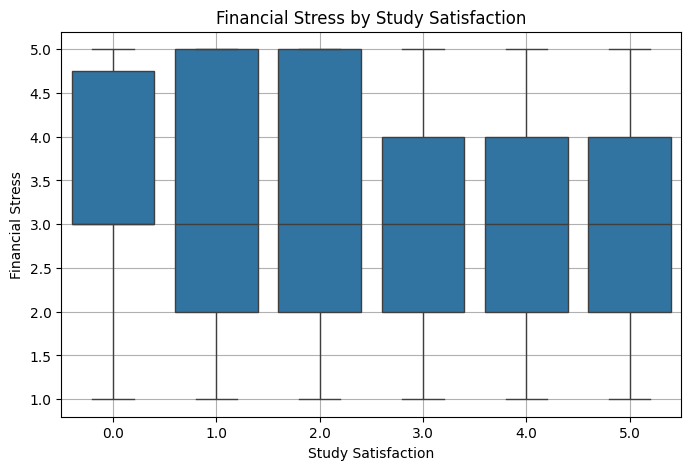

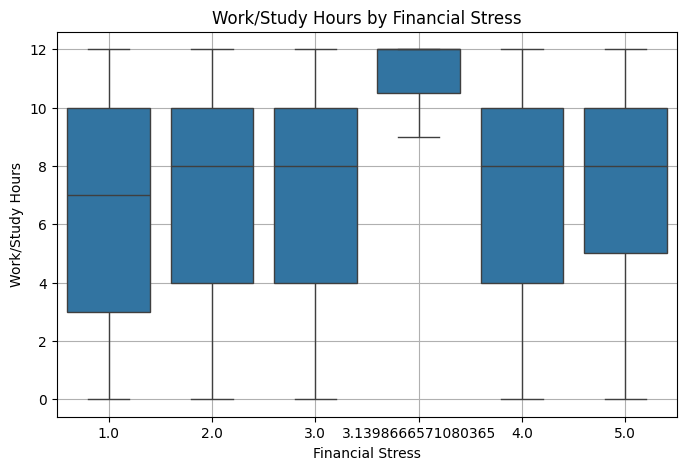

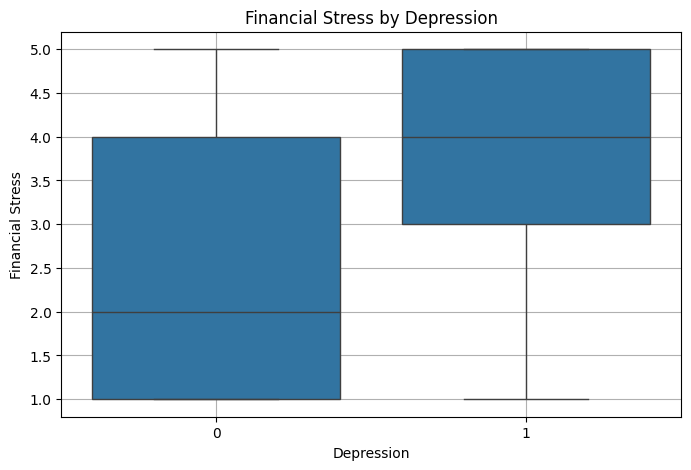

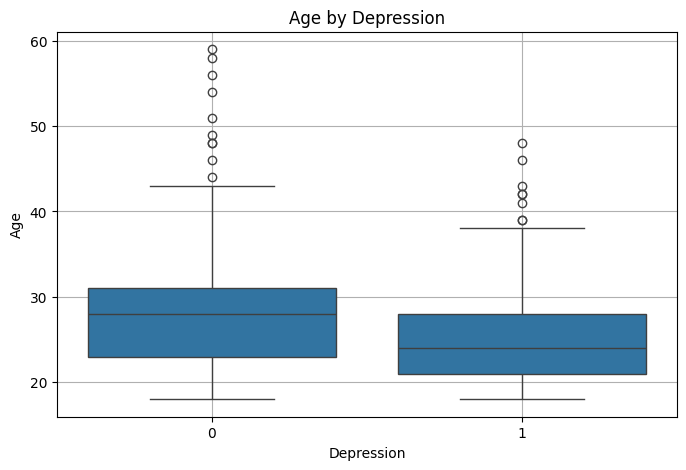

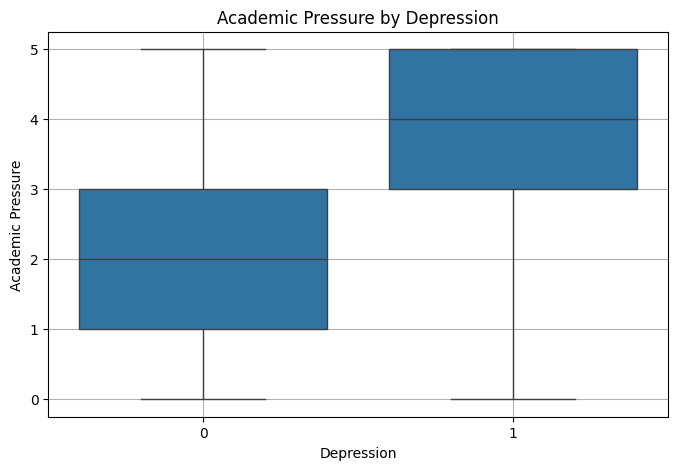

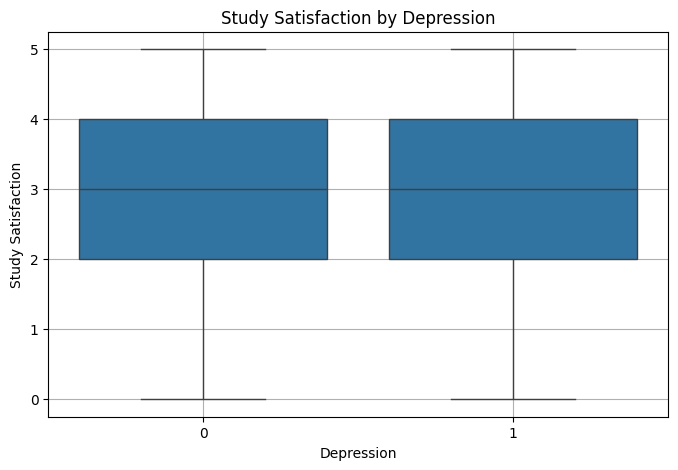

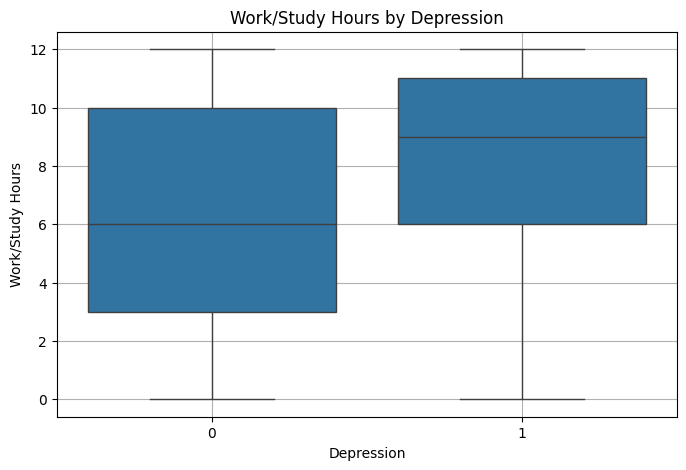

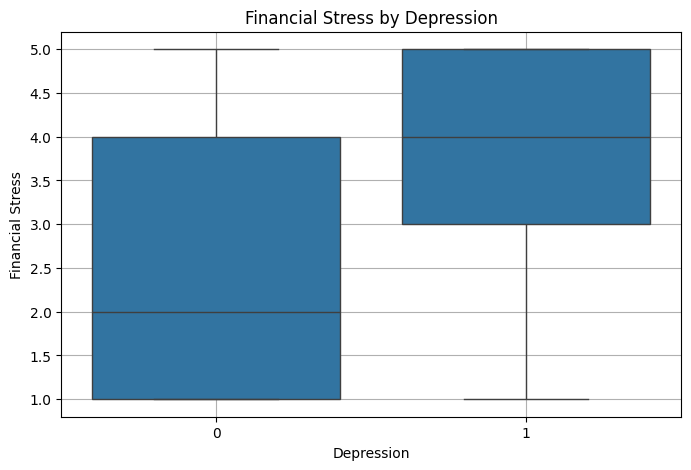

Plotted distribution of Academic Pressure grouped by Age
Plotted distribution of Study Satisfaction grouped by Age
Plotted distribution of Work/Study Hours grouped by Age
Plotted distribution of Financial Stress grouped by Age
Plotted distribution of Depression grouped by Age
Plotted distribution of Age grouped by Academic Pressure
Plotted distribution of Study Satisfaction grouped by Academic Pressure
Plotted distribution of Work/Study Hours grouped by Academic Pressure
Plotted distribution of Financial Stress grouped by Academic Pressure
Plotted distribution of Depression grouped by Academic Pressure
Plotted distribution of Age grouped by Study Satisfaction
Plotted distribution of Academic Pressure grouped by Study Satisfaction
Plotted distribution of Work/Study Hours grouped by Study Satisfaction
Plotted distribution of Financial Stress grouped by Study Satisfaction
Plotted distribution of Depression grouped by Study Satisfaction
Plotted distribution of Age grouped by Work/Study Hou

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_df_copy = numerical_df.copy()
numerical_df_copy.fillna(numerical_df_copy.mean(), inplace=True)

def plot_categorical_dependency(df, feature_x, feature_y):
    plt.figure(figsize=(8, 5))

    if df[feature_x].nunique() < df[feature_y].nunique():
        # X is more categorical — boxplot makes sense
        sns.boxplot(x=feature_x, y=feature_y, data=df)
        plt.title(f'{feature_y} by {feature_x}')
    else:
        # Flip if Y is more categorical
        sns.boxplot(x=feature_y, y=feature_x, data=df)
        plt.title(f'{feature_x} by {feature_y}')

    plt.grid(True)
    plt.show()
    return (feature_x, feature_y)

# Compare features' relationships with each other
features_to_plot = [
    'Age', 'Academic Pressure',
    'Study Satisfaction', 'Work/Study Hours',
    'Financial Stress', 'Depression'
]

results = []
for feature_x in features_to_plot:
    for feature_y in features_to_plot:
        if feature_x != feature_y:
            result = plot_categorical_dependency(numerical_df_copy, feature_x, feature_y)
            results.append(result)

for x, y in results:
    print(f"Plotted distribution of {y} grouped by {x}")

### Polynomial Regression

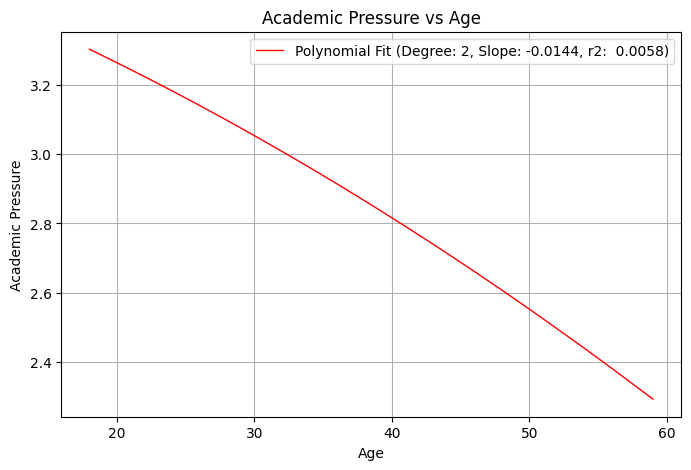

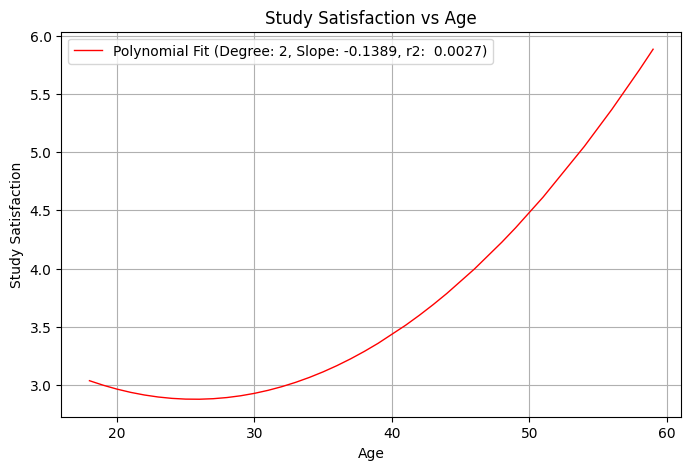

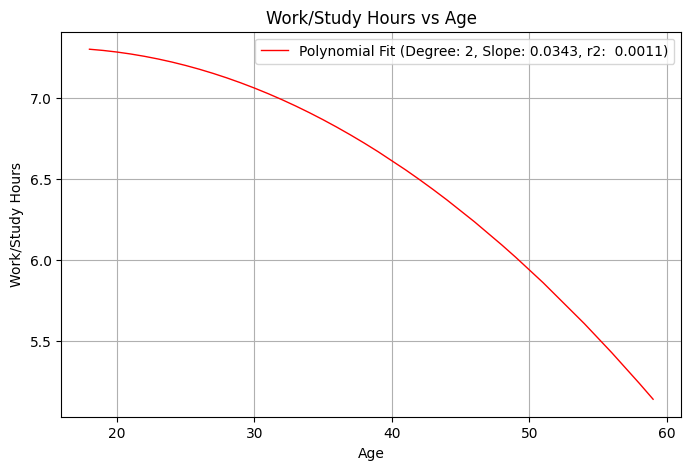

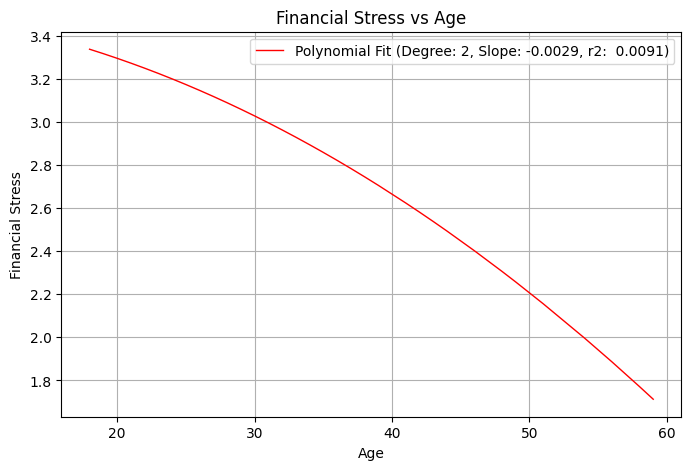

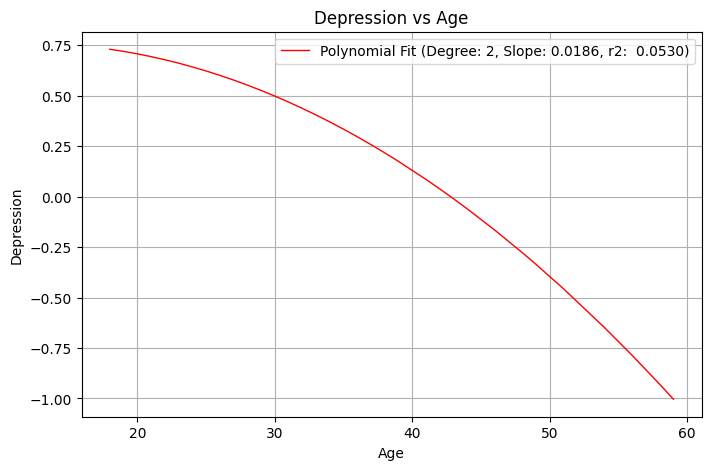

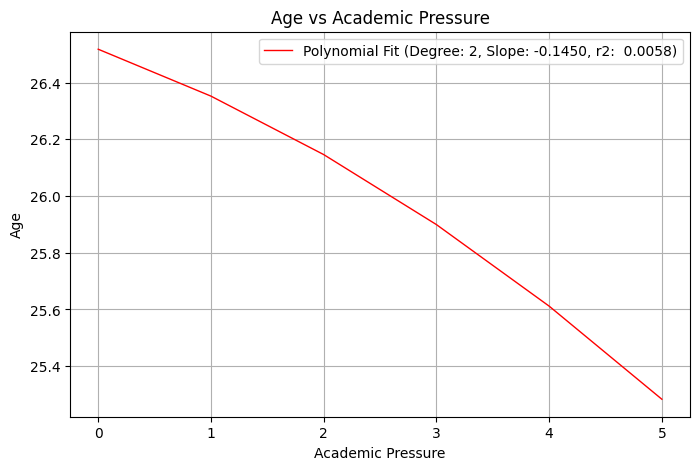

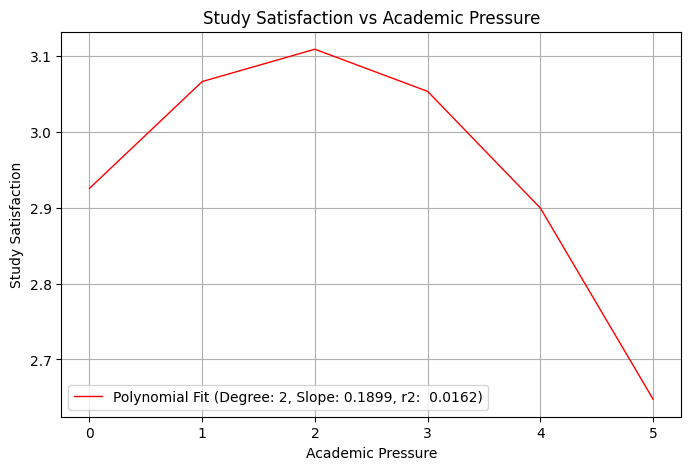

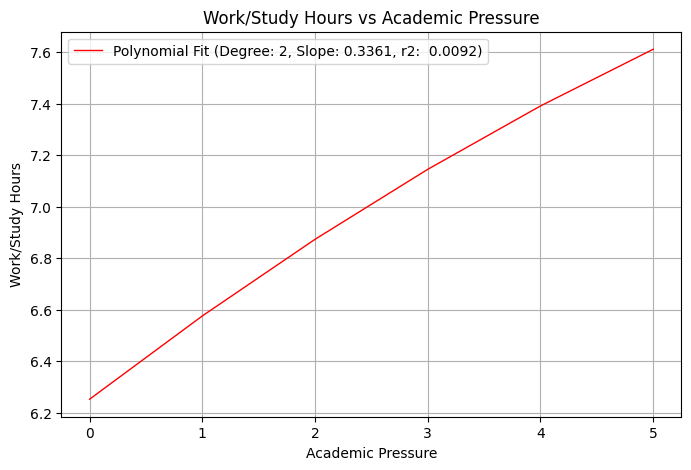

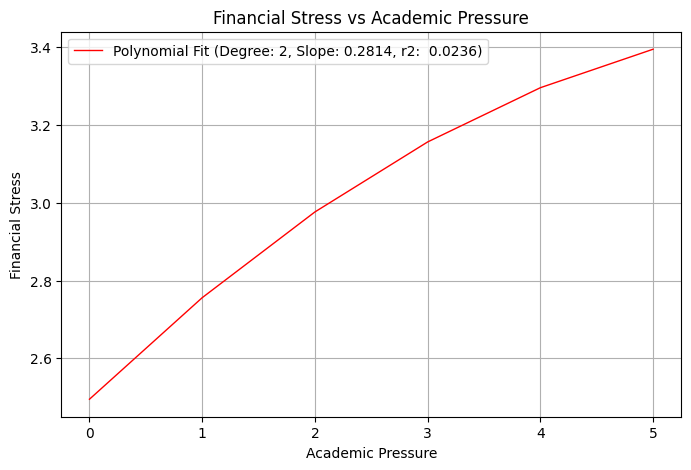

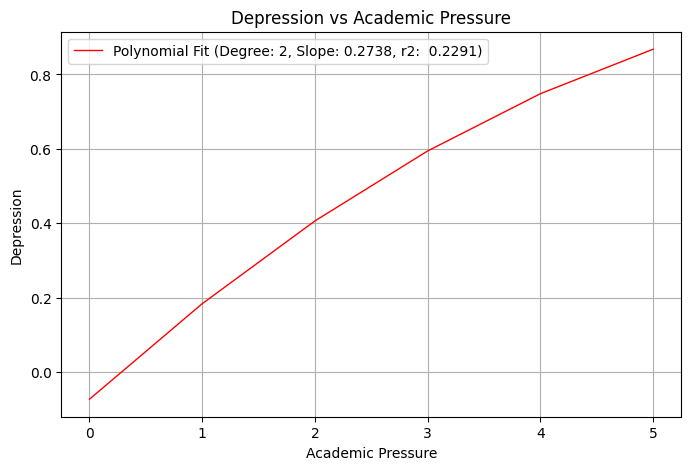

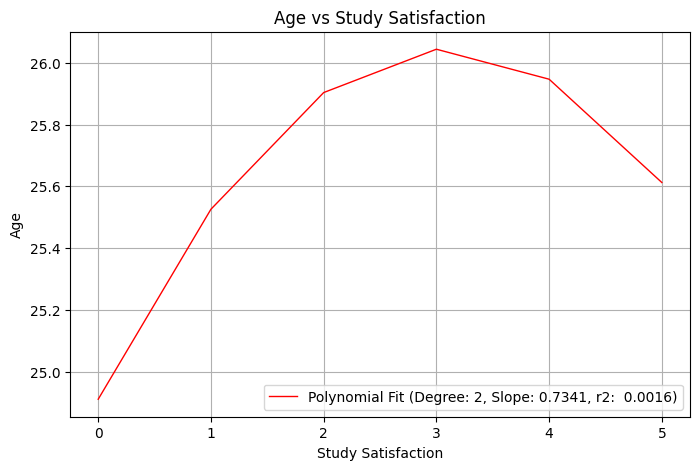

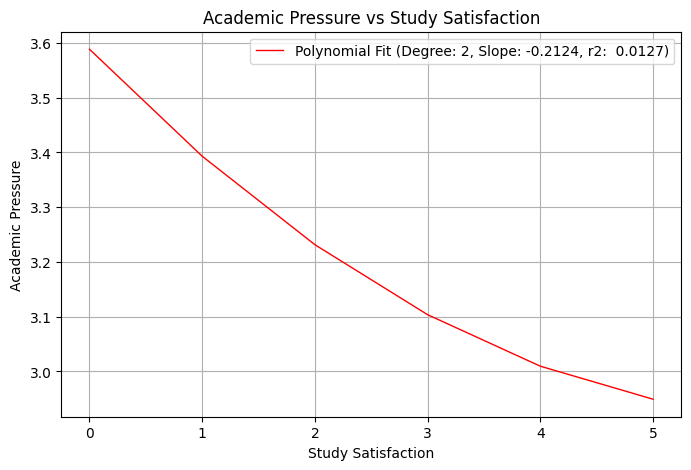

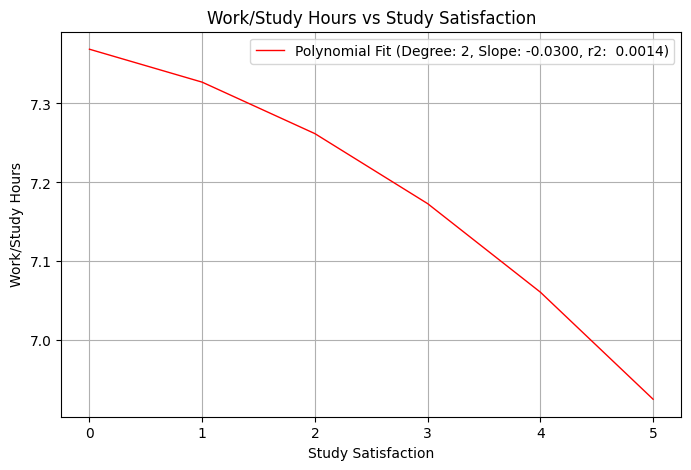

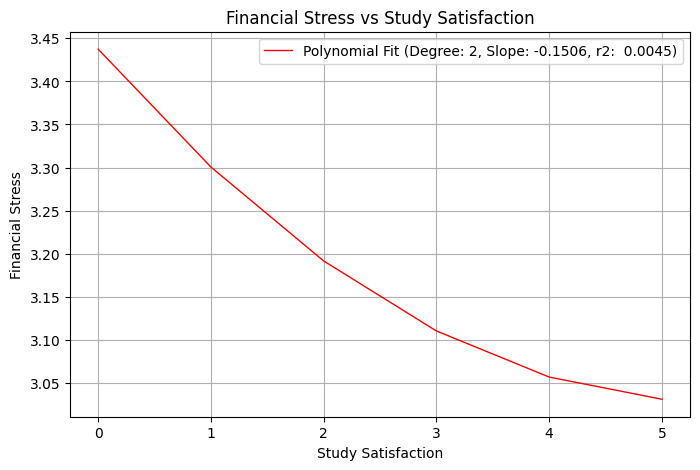

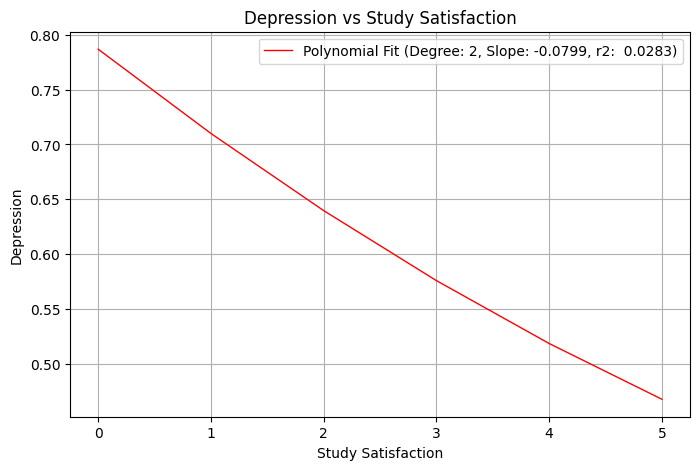

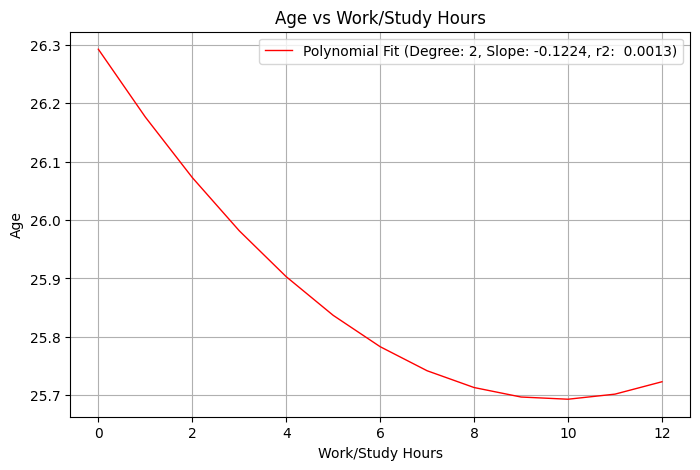

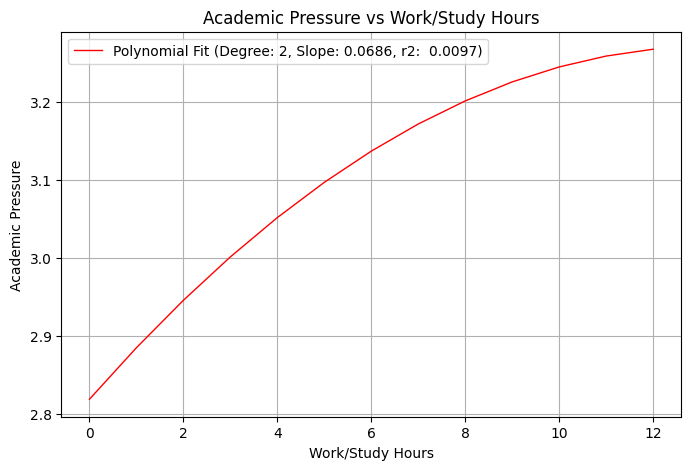

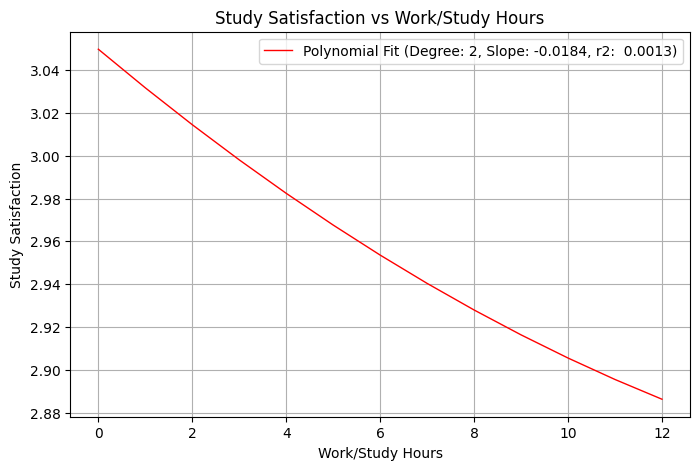

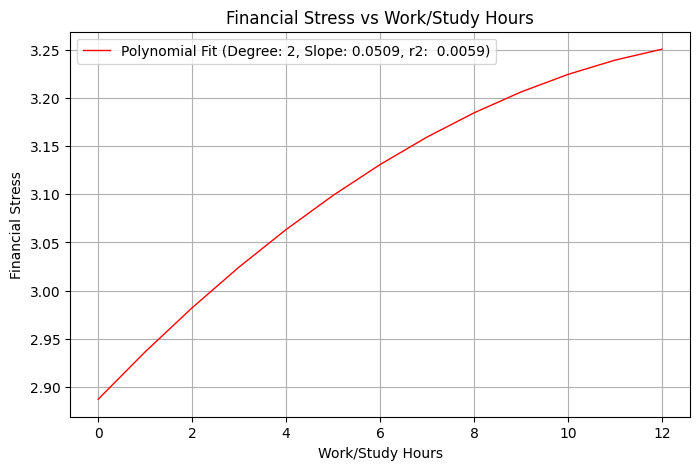

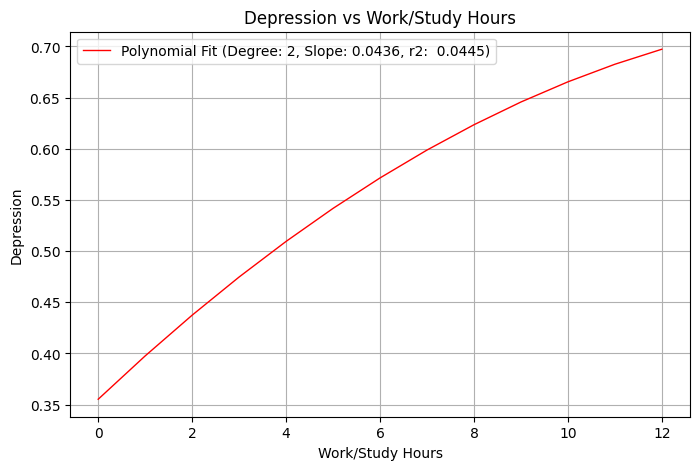

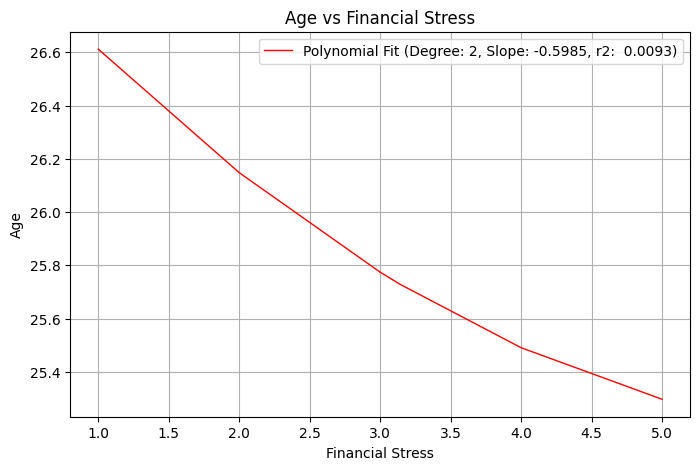

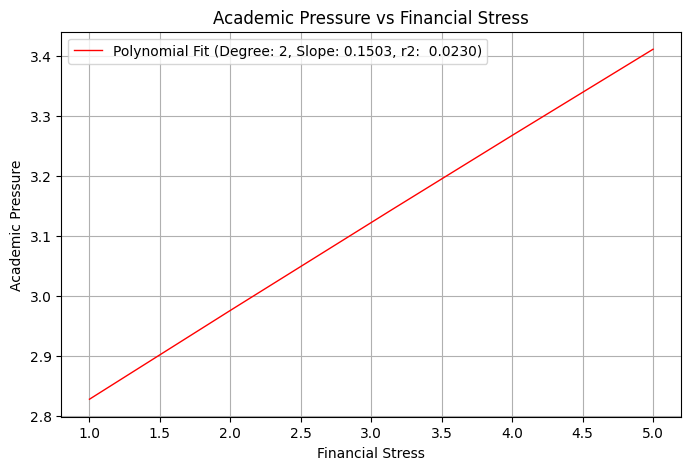

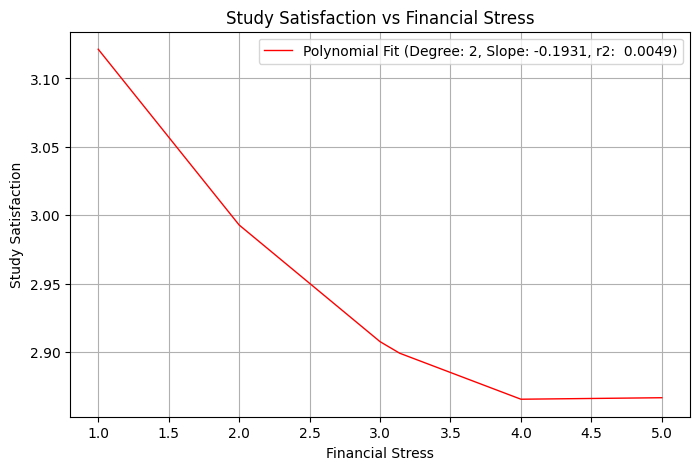

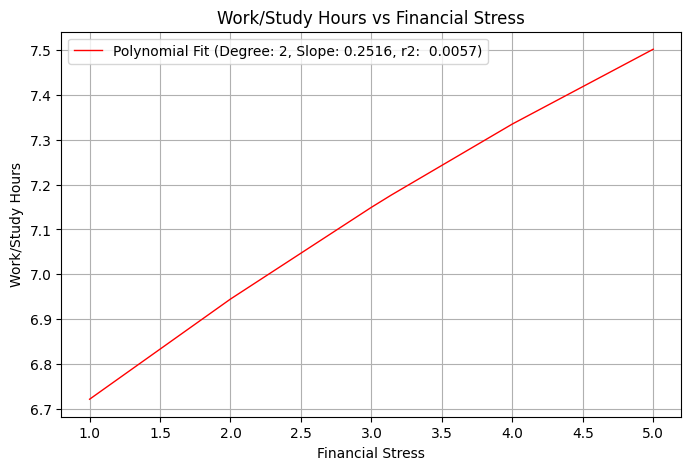

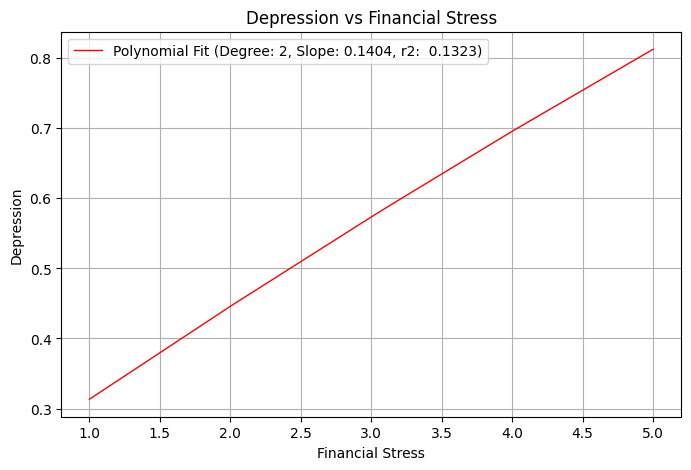

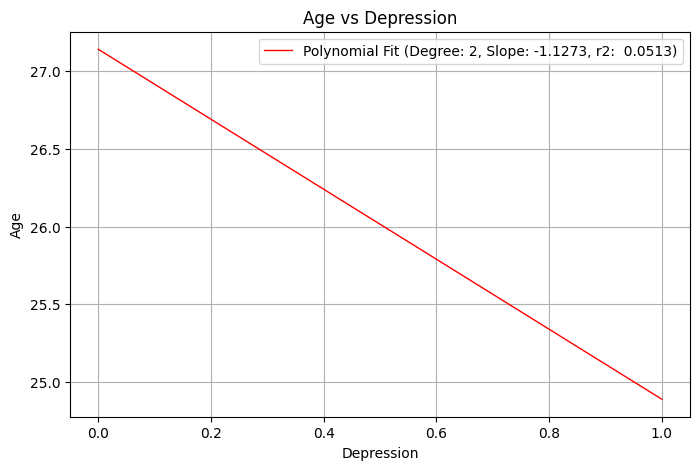

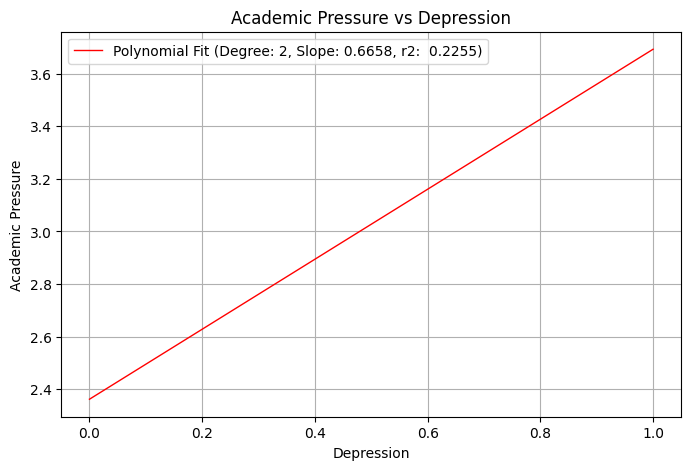

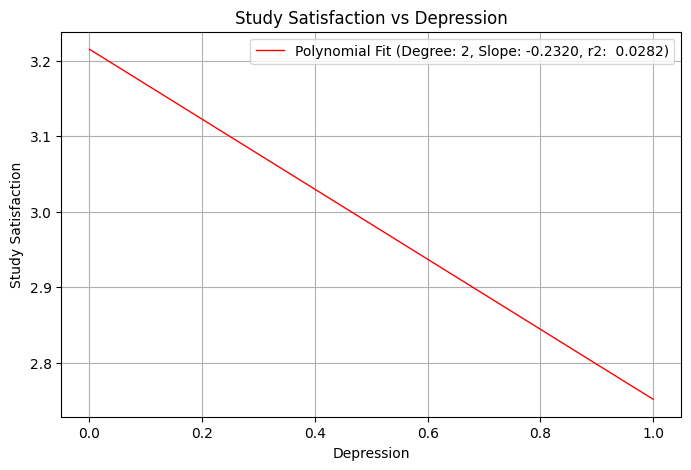

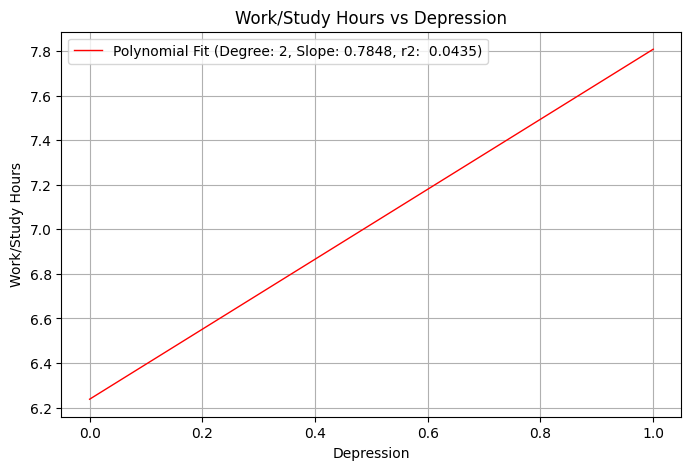

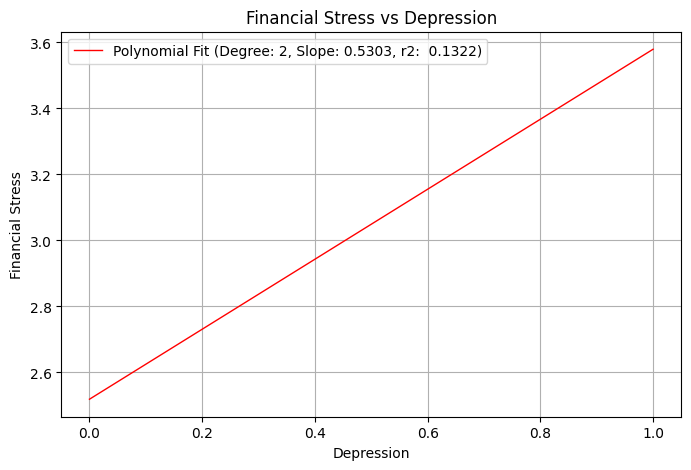

Age 'vs' Academic Pressure | Slope: -0.014409155802597346 | R²: 0.005752233327773193
Age 'vs' Study Satisfaction | Slope: -0.1389056915032254 | R²: 0.0026846812419069055
Age 'vs' Work/Study Hours | Slope: 0.034267077426415965 | R²: 0.001145510557301721
Age 'vs' Financial Stress | Slope: -0.0028842742146432876 | R²: 0.00910139776744634
Age 'vs' Depression | Slope: 0.01864400453710125 | R²: 0.052964872401654595
Academic Pressure 'vs' Age | Slope: -0.14500711330102228 | R²: 0.005797697517298417
Academic Pressure 'vs' Study Satisfaction | Slope: 0.1898780987283823 | R²: 0.016205345717991815
Academic Pressure 'vs' Work/Study Hours | Slope: 0.33606847873038936 | R²: 0.00924638400751343
Academic Pressure 'vs' Financial Stress | Slope: 0.28136080295716853 | R²: 0.023606284303618552
Academic Pressure 'vs' Depression | Slope: 0.2738022729155333 | R²: 0.22908505671407609
Study Satisfaction 'vs' Age | Slope: 0.7341155981406752 | R²: 0.0016474686113753245
Study Satisfaction 'vs' Academic Pressure |

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_feature_dependency(df, feature_x, feature_y, degree):

    degree = 2
    # Fit polynomial regression
    X = df[[feature_x]].values
    y = df[feature_y].values
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict line
    y_pred = model.predict(X_poly)
    slope = model.coef_[1]  # First polynomial coefficient
    r2 = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(sorted(df[feature_x]), model.predict(poly.transform(sorted(df[feature_x].values.reshape(-1, 1)))), color='red', linewidth=1, label=f'Polynomial Fit (Degree: {degree}, Slope: {slope:.4f}, r2: {r2: .4f})')
    plt.title(f"{feature_y} vs {feature_x}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.grid(True)
    plt.show()
    return (feature_x, feature_y, slope, r2)

# Compare features relationship with depression
features_to_plot = [
    'Age' , 'Academic Pressure',
    'Study Satisfaction', 'Work/Study Hours',
    'Financial Stress', 'Depression'
]
results = []
for feature_x in features_to_plot:
    for feature_y in features_to_plot:
        if feature_x != feature_y:
            result = plot_feature_dependency(numerical_df_copy, feature_x, feature_y, degree=2)
            results.append(result)

# Print results
for x, y, slope, r2 in results:
    print(f"{x} 'vs' {y} | Slope: {slope} | R²: {r2}")

## Cleaning and Processing Data

In [10]:
df = depression_df.copy()

# Drop nulls and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Drop work pressure column for multicollinearity
df = df.drop(columns=['Work Pressure'], axis=1)

# Targeting Age, Work Pressure, CGPA, and Job Satisfaction for outliers
target_cols = ['Age', 'CGPA', 'Job Satisfaction']
original_len = len(df)

for col in target_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out outliers
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Show how many rows were removed
removed_rows = original_len - len(df)
print(f"Original dataset size: {original_len}")
print(f"Cleaned dataset size: {len(df)}")
print(f"Removed {removed_rows} rows")

Original dataset size: 27898
Cleaned dataset size: 27875
Removed 23 rows


In [11]:
categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

X = df.drop(['id', 'Depression'], axis=1)
y = df['Depression']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# View if there is class imbalance
class_counts = y.value_counts().to_frame()
class_counts.index = ["Positive", "Negative"]
display(class_counts)

,count
Positive,16328
Negative,11547


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=16)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((22300, 15), (5575, 15), (22300,), (5575,))

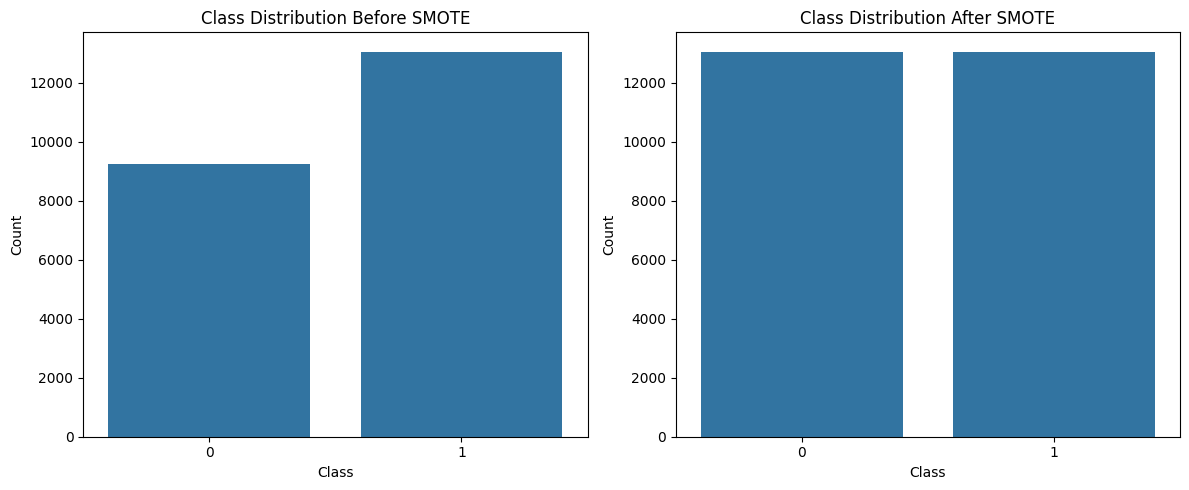

Before SMOTE: Depression
1    13049
0     9251
Name: count, dtype: int64
After SMOTE: Depression
1    13049
0    13049
Name: count, dtype: int64


In [14]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=16)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Print the new class distribution
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

## Machine Learning Models

In [15]:
def evaluate_model(model, name, X, y):
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print()

    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ["No Depression", "Depression"])
    plt.yticks([0.5, 1.5], ["Depression", "Depression"])
    plt.show()

    return (accuracy, precision, recall, f1)

### Logistic Regression

Accuracy:  0.8342600896860987
Precision:  0.8713339640491958
Recall:  0.8426349496797805
F1 Score:  0.8567441860465116



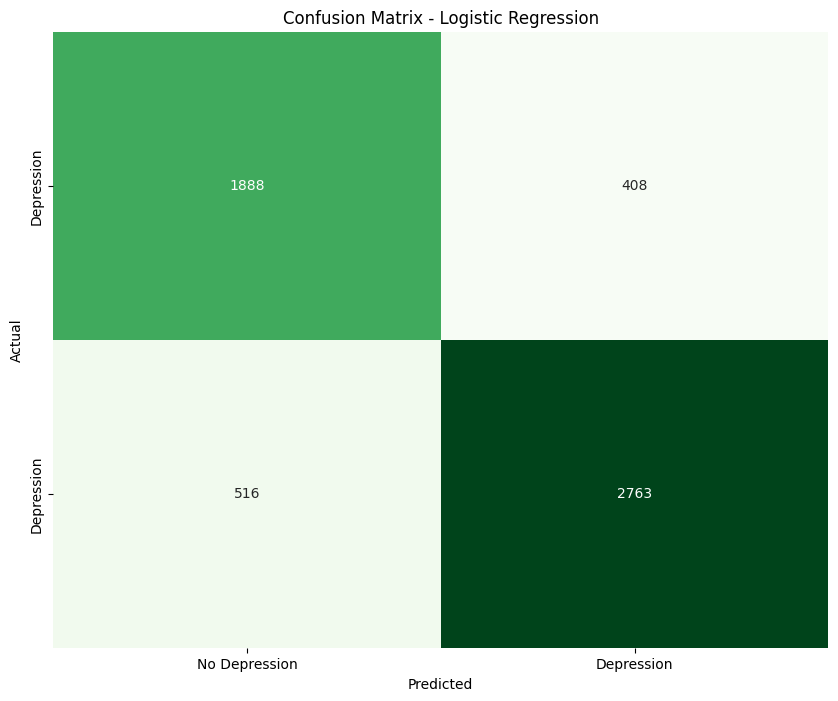

In [16]:
logistic_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=16)
logistic_model.fit(X_train_resampled, y_train_resampled)
logistic_result = evaluate_model(logistic_model, "Logistic Regression", X_test, y_test)

### KNN

In [17]:
# parameter_values = {"n_neighbors": list(range(1, 20, 2)),
#                     "weights": ["uniform", "distance"],
#                     "p": [1, 1.5, 2]
#                    }
# gs_knn = KNeighborsClassifier()
# gs = GridSearchCV(gs_knn, parameter_values, scoring="f1", n_jobs=-1)
# gs.fit(X_train_resampled, y_train_resampled)
# GridsearchCV to find best parameters

# Best parameters:  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Accuracy:  0.8168609865470852
Precision:  0.84232868405094
Recall:  0.8472095150960659
F1 Score:  0.8447620495666718



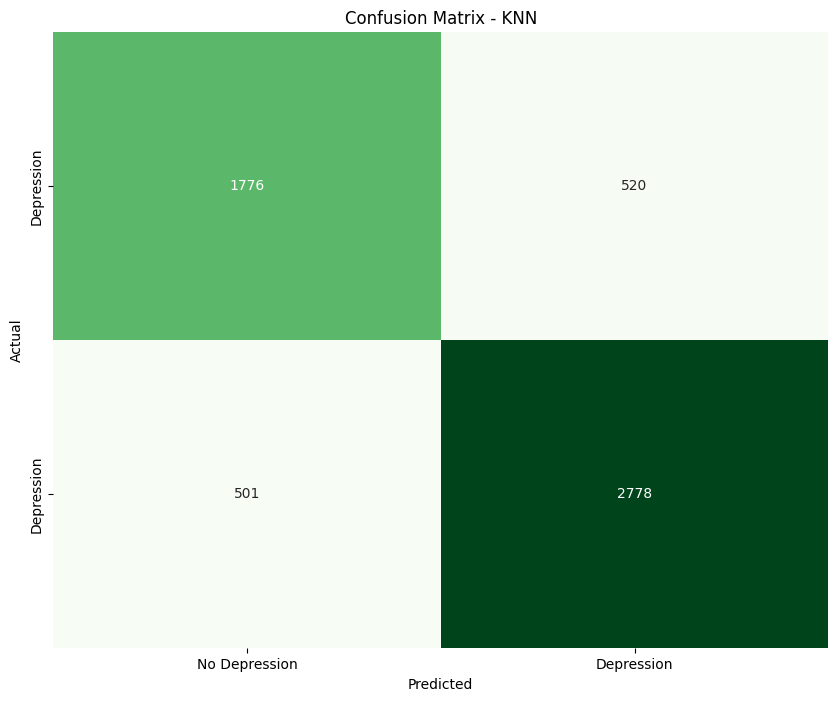

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)
knn_result = evaluate_model(knn_model, "KNN", X_test, y_test)

### Decision Tree

Decision Tree Model Evaluation:
Accuracy:  0.8211659192825113
Precision:  0.8440892641737032
Recall:  0.8536139066788655
F1 Score:  0.8488248673237301



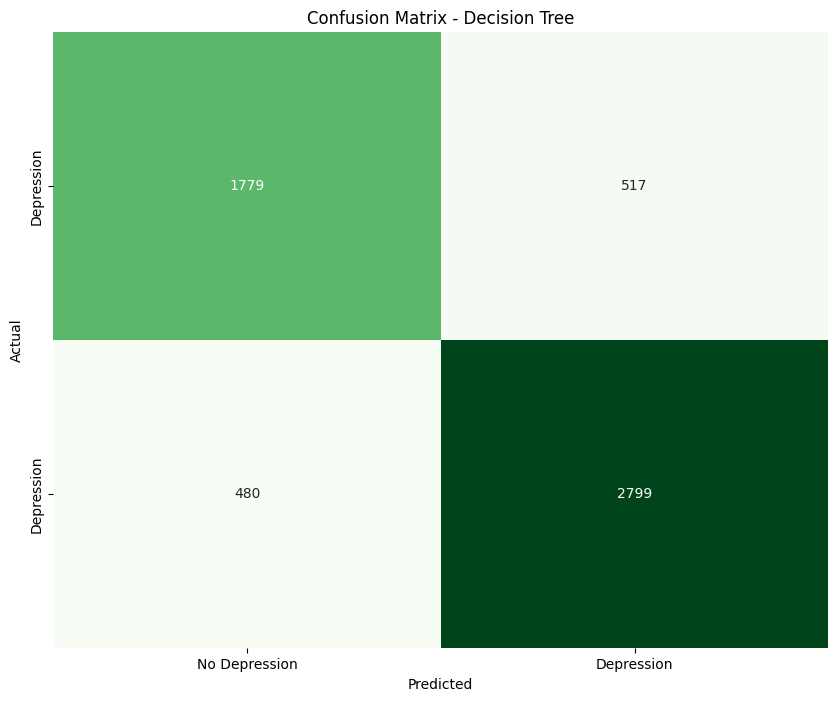

(0.8211659192825113,
 0.8440892641737032,
 0.8536139066788655,
 0.8488248673237301)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate a Decision Tree model
dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='entropy',
    max_depth=10,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=1217
    )
dt_model.fit(X_train_resampled, y_train_resampled)
print("Decision Tree Model Evaluation:")
evaluate_model(dt_model, "Decision Tree", X_test, y_test)

### Bagging

Bagging Model Evaluation:
Accuracy:  0.8304932735426009
Precision:  0.8562271062271062
Recall:  0.8554437328453797
F1 Score:  0.8558352402745996



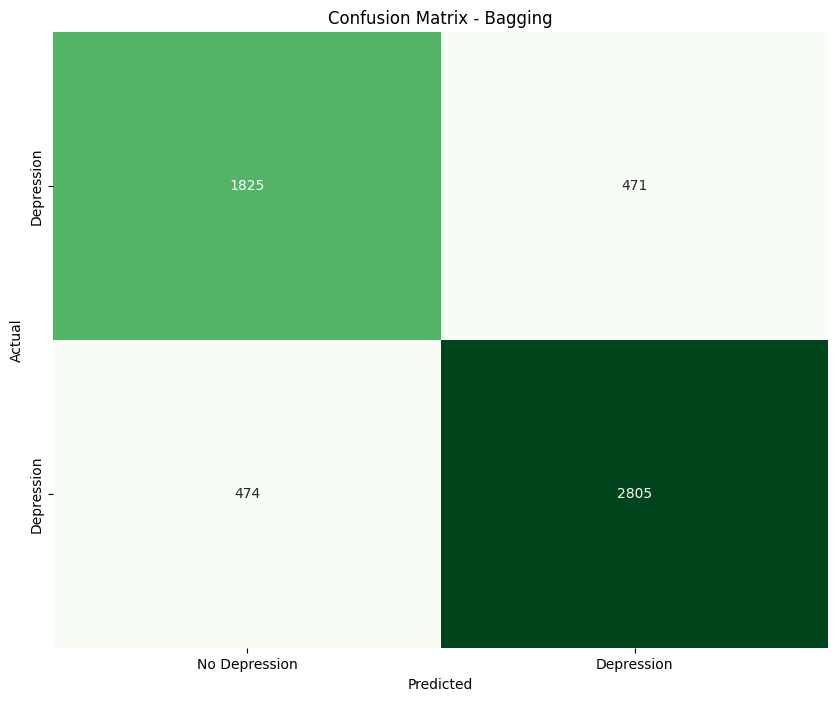

(0.8304932735426009,
 0.8562271062271062,
 0.8554437328453797,
 0.8558352402745996)

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
bag_model = BaggingClassifier(
    estimator=estimator,
    n_estimators=100,
    max_samples=1.0,
    max_features=0.5,
    bootstrap=True,
    random_state=295
)

bag_model.fit(X_train_resampled, y_train_resampled)
print("Bagging Model Evaluation:")
evaluate_model(bag_model, "Bagging", X_test, y_test)


### AdaBoost

AdaBoost Model Evaluation:
Accuracy:  0.8396412556053812
Precision:  0.8665846910544113
Recall:  0.8597133272339128
F1 Score:  0.8631353337415799



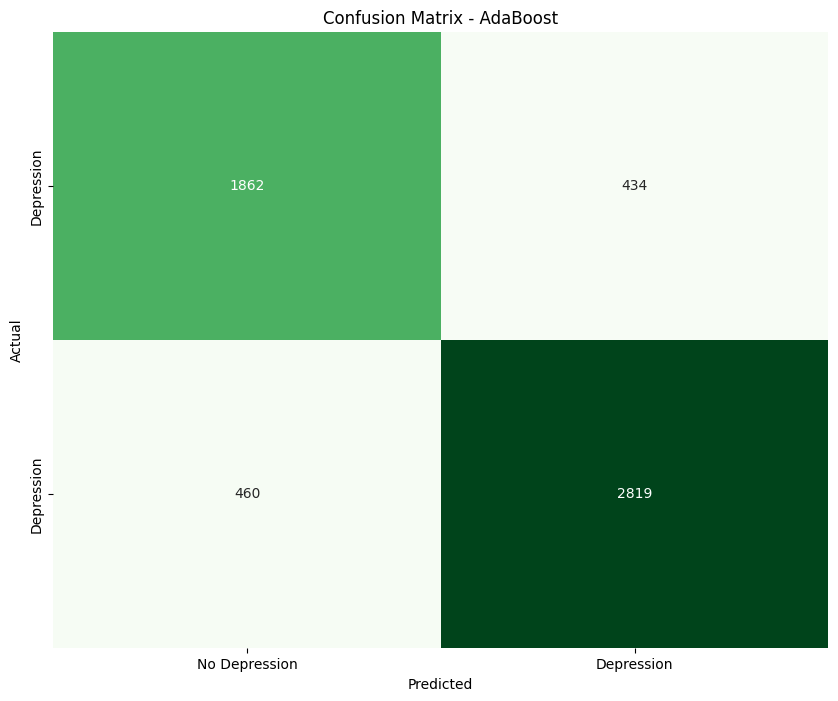

(0.8396412556053812,
 0.8665846910544113,
 0.8597133272339128,
 0.8631353337415799)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=1)
adc = AdaBoostClassifier(estimator=estimator, learning_rate=1.0, n_estimators=100, random_state=1366)


adc.fit(X_train_resampled, y_train_resampled)
print("AdaBoost Model Evaluation:")
evaluate_model(adc, "AdaBoost", X_test, y_test)

### Stacking

Stacking Model Evaluation:
Accuracy:  0.8087892376681615
Precision:  0.8391051179895801
Recall:  0.8350106739859713
F1 Score:  0.837052889024763



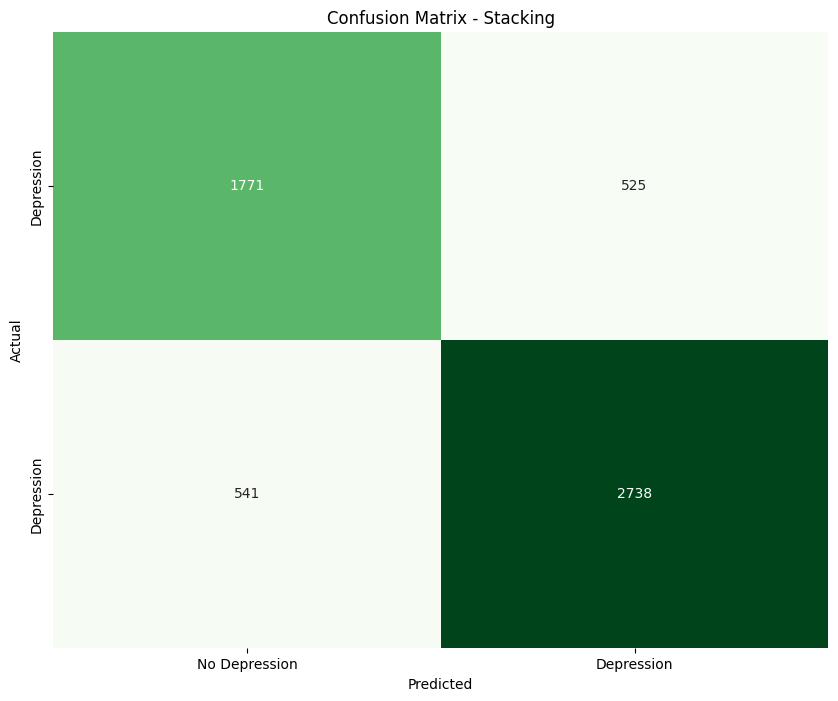

(0.8087892376681615, 0.8391051179895801, 0.8350106739859713, 0.837052889024763)

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# better base models than previous iteration
base_models = [
    ("Decision Tree", DecisionTreeClassifier(class_weight='balanced',
                                                criterion='entropy',
                                                max_depth=10,
                                                max_leaf_nodes=None,
                                                min_samples_leaf=2,
                                                min_samples_split=2,
                                                random_state=1217)),
    ("Random Forest", RandomForestClassifier(n_estimators=200,
                                                max_depth=None,
                                                max_features='sqrt',
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                bootstrap=False,
                                                random_state=1217)),
    ("AdaBoost", AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=1366))
]

meta_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

sc = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, passthrough=True)

sc.fit(X_train_resampled, y_train_resampled)

evaluate_model(sc, "Stacking", X_test, y_test)

### Random Forest

Random Forest Model Evaluation:
Accuracy:  0.8324663677130045
Precision:  0.8526315789473684
Recall:  0.8645928636779506
F1 Score:  0.8585705632949727



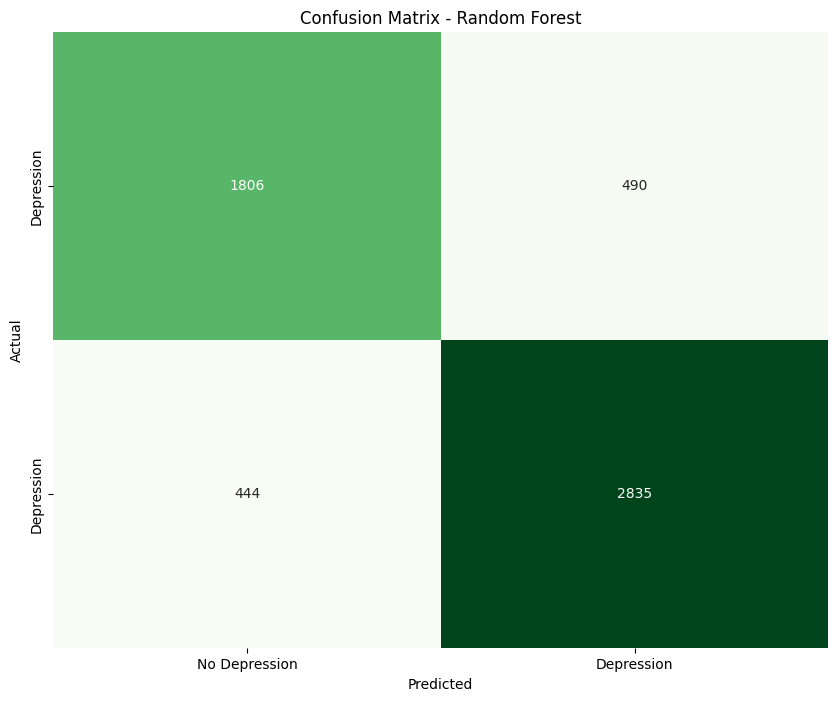

(0.8324663677130045,
 0.8526315789473684,
 0.8645928636779506,
 0.8585705632949727)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=False,
    random_state=1217
    )
rf_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest Model Evaluation:")
evaluate_model(rf_model, "Random Forest", X_test, y_test)

### SVM

SVM Model Evaluation:
Accuracy:  0.8234977578475337
Precision:  0.8558139534883721
Recall:  0.8417200365965233
F1 Score:  0.8487084870848709



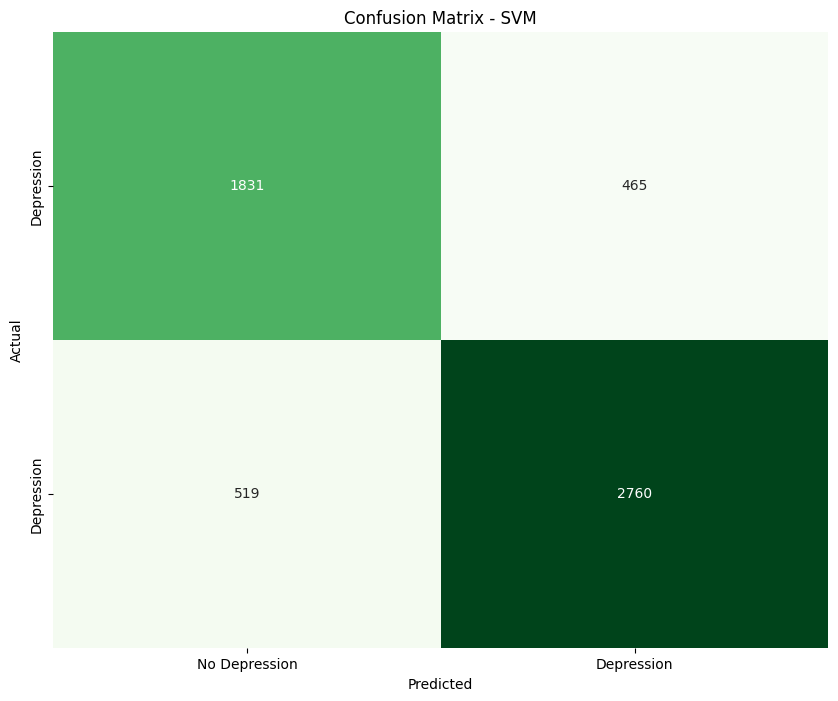

(0.8234977578475337,
 0.8558139534883721,
 0.8417200365965233,
 0.8487084870848709)

In [ ]:
from sklearn.svm import SVC

# Train and evaluate a Support Vector Machine (SVM) model
svm_model = SVC(
    C=10,
    kernel='rbf',
    gamma='scale',
    degree=2,
    random_state=1217
    )
svm_model.fit(X_train_resampled, y_train_resampled)
print("SVM Model Evaluation:")
evaluate_model(svm_model, "SVM", X_test, y_test)

### Neural Networks


 Training Baseline Model


c:\Users\zzeng\anaconda3\envs\CIS4930\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluating on Test Set:
{'loss': 0.3710286021232605, 'compile_metrics': 0.8358744382858276}
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2296
           1       0.86      0.86      0.86      3279

    accuracy                           0.84      5575
   macro avg       0.83      0.83      0.83      5575
weighted avg       0.84      0.84      0.84      5575



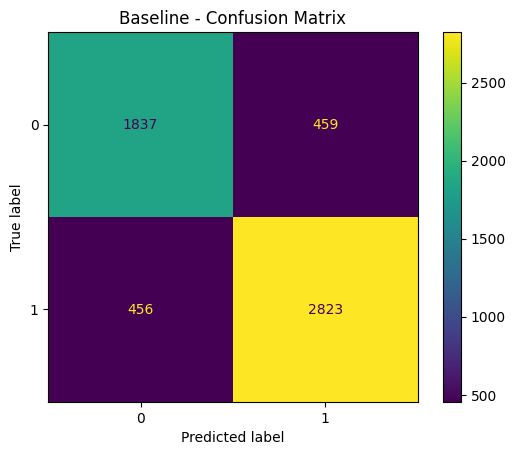

Metrics: 



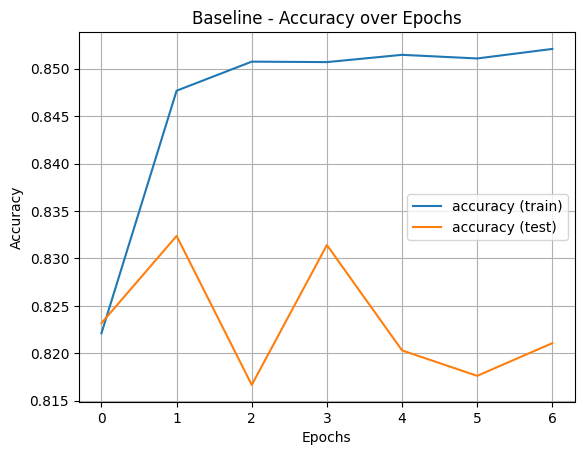

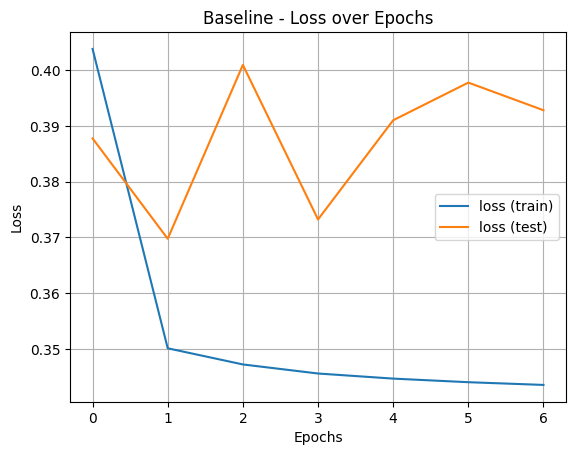

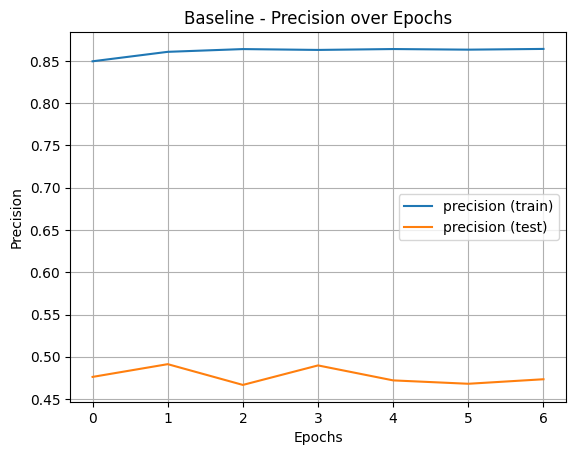

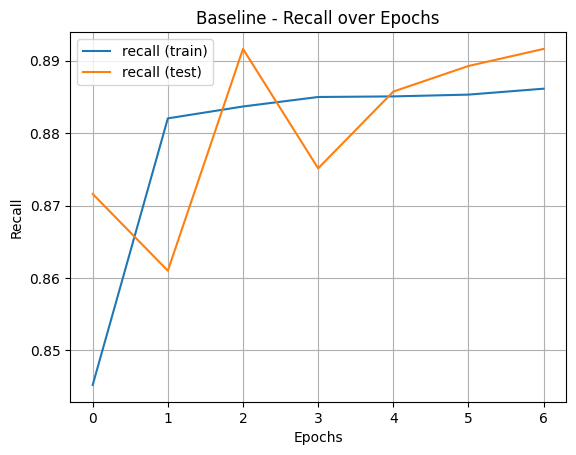


 Training Deep Model


c:\Users\zzeng\anaconda3\envs\CIS4930\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluating on Test Set:
{'loss': 0.36828702688217163, 'compile_metrics': 0.8373094201087952}
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2296
           1       0.86      0.87      0.86      3279

    accuracy                           0.84      5575
   macro avg       0.83      0.83      0.83      5575
weighted avg       0.84      0.84      0.84      5575



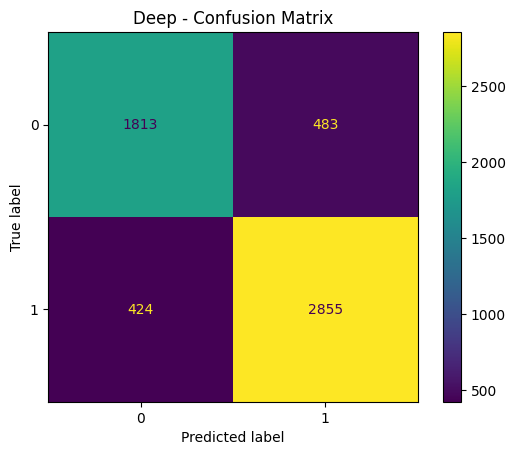

Metrics: 



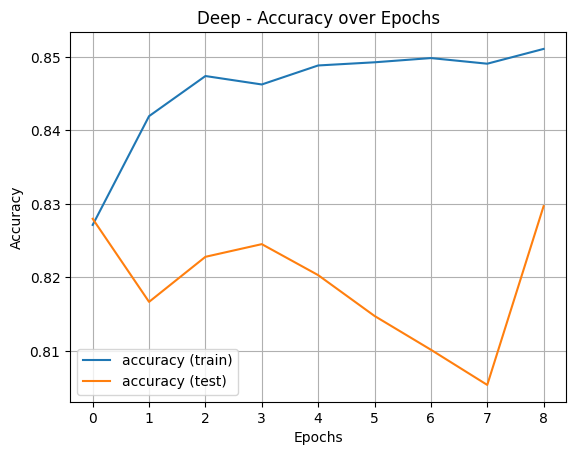

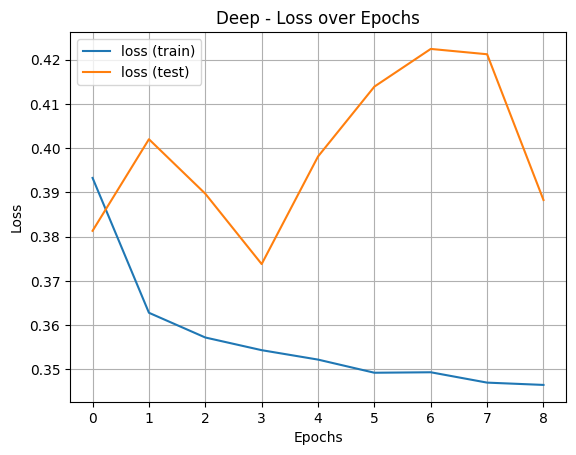

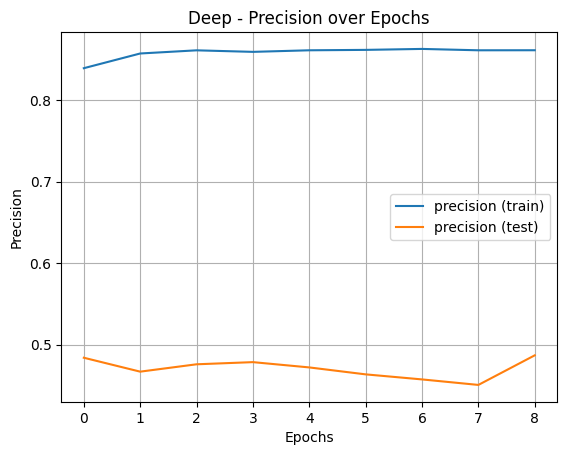

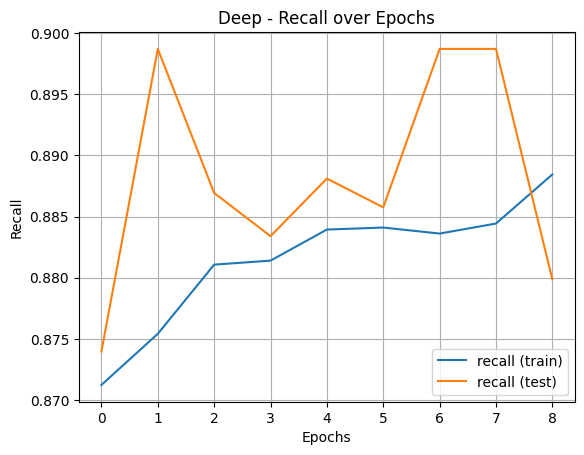


 Training Wide Model


c:\Users\zzeng\anaconda3\envs\CIS4930\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluating on Test Set:
{'loss': 0.3672378361225128, 'compile_metrics': 0.8367713093757629}
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2296
           1       0.86      0.86      0.86      3279

    accuracy                           0.84      5575
   macro avg       0.83      0.83      0.83      5575
weighted avg       0.84      0.84      0.84      5575



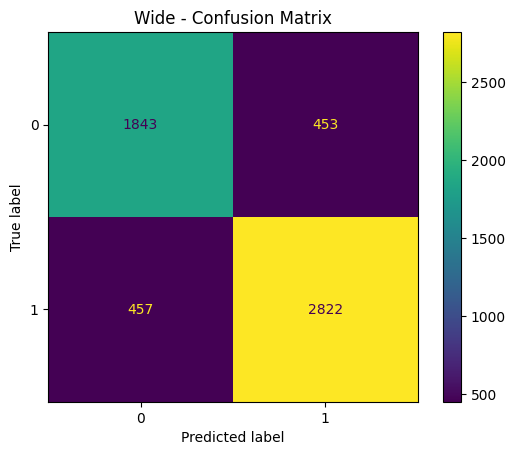

Metrics: 



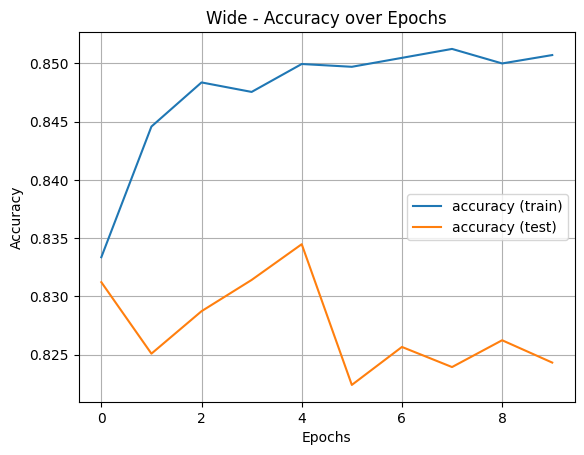

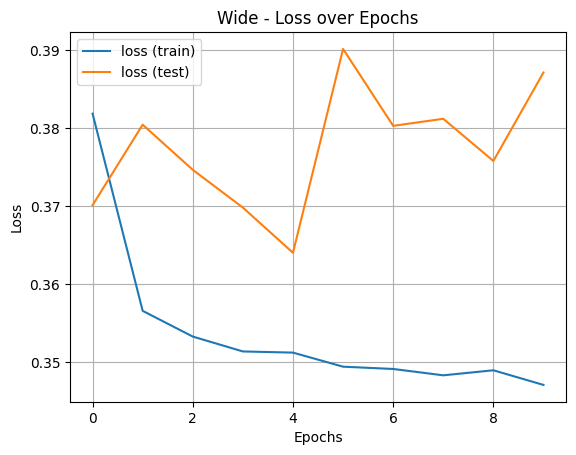

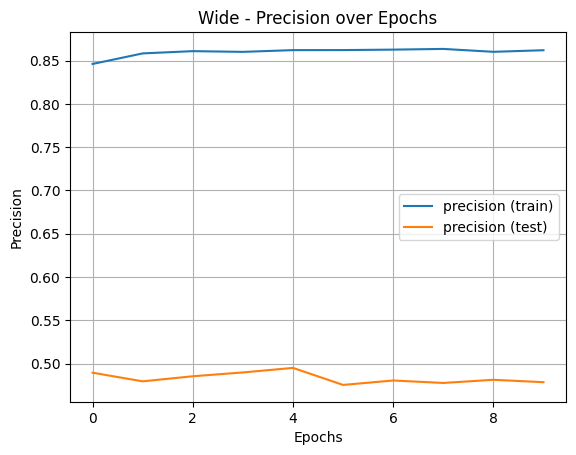

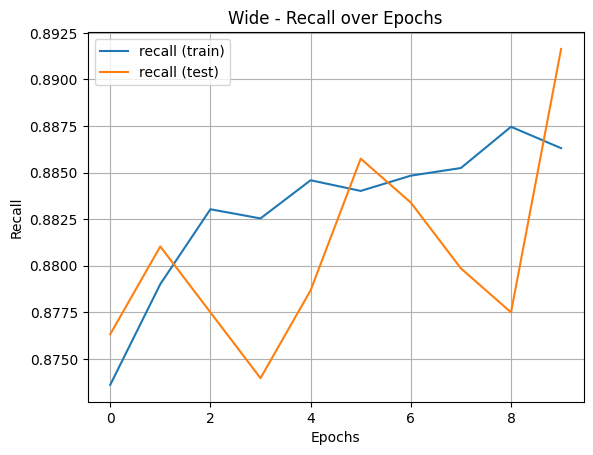

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

# Function to build a simple baseline model
def build_baseline_model(input_shape):
    model = Sequential(name='Baseline')
    model.add(Dense(32, activation='relu', input_shape=input_shape))  # Single hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Function to build a deeper neural network model
def build_deep_model(input_shape):
    model = Sequential(name='Deep')
    model.add(Dense(64, activation='relu', input_shape=input_shape))  # First hidden layer
    model.add(Dropout(0.3))  # Dropout for regularization
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(16, activation='relu'))  # Third hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Function to build a wider neural network model
def build_wide_model(input_shape):
    model = Sequential(name='Wide')
    model.add(Dense(128, activation='relu', input_shape=input_shape))  # Wide hidden layer
    model.add(Dropout(0.4))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

def build_model(name, input_shape):
    if name == 'Baseline':
        return build_baseline_model(input_shape)
    elif name == 'Deep':
        return build_deep_model(input_shape)
    elif name == 'Wide':
        return build_wide_model(input_shape)

# List of model types to train
models = ['Baseline', 'Deep', 'Wide']

# Loop through each model type, train, and evaluate
for name in models:
    print(f"\n Training {name} Model")

    # Build the model
    model = build_model(name, (X_train_resampled.shape[1],))

    # Compile the model with binary crossentropy loss and relevant metrics
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision', 'recall'])

    # Define early stopping callback to prevent overfitting
    early_stop = EarlyStopping(patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_resampled, y_train_resampled,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=0)

    # Evaluate the model on test data
    print("Evaluating on Test Set:")
    results = model.evaluate(X_test, y_test, verbose=0)
    print(dict(zip(model.metrics_names, results)))  # Display metrics

    # Make predictions
    y_probs = model.predict(X_test)  # Probabilities
    y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to class labels

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    # Function to plot training history for each metric
    def plot_history(history, metric):
        plt.plot(history.history[metric], label=f'{metric} (train)')
        plt.plot(history.history[f'val_{metric}'], label=f'{metric} (test)')
        plt.title(f'{name} - {metric.capitalize()} over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()

    print("Metrics: \n")
    # Plot all relevant metrics
    for metric in ['accuracy', 'loss', 'precision', 'recall']:
        plot_history(history, metric)


### Feature engineering

XGBoost with RFE-selected Features
Accuracy: 0.8383856502242153
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2324
           1       0.85      0.87      0.86      3251

    accuracy                           0.84      5575
   macro avg       0.83      0.83      0.83      5575
weighted avg       0.84      0.84      0.84      5575



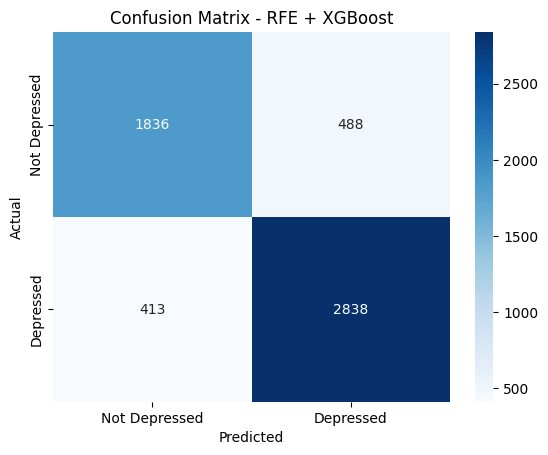

In [26]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
# RFE with XGboost

# Prepare data
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']

# Scale features
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Wrapper method: Recursive Feature Elimination (RFE) with XGBoost
base_model = XGBClassifier(eval_metric='logloss', random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model on selected features
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

# Evaluate
print("XGBoost with RFE-selected Features")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Depressed", "Depressed"],
            yticklabels=["Not Depressed", "Depressed"])
plt.title("Confusion Matrix - RFE + XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Chi-Squared Feature Selection + SVM
Accuracy: 0.8475336322869955
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2324
           1       0.85      0.90      0.87      3251

    accuracy                           0.85      5575
   macro avg       0.85      0.84      0.84      5575
weighted avg       0.85      0.85      0.85      5575



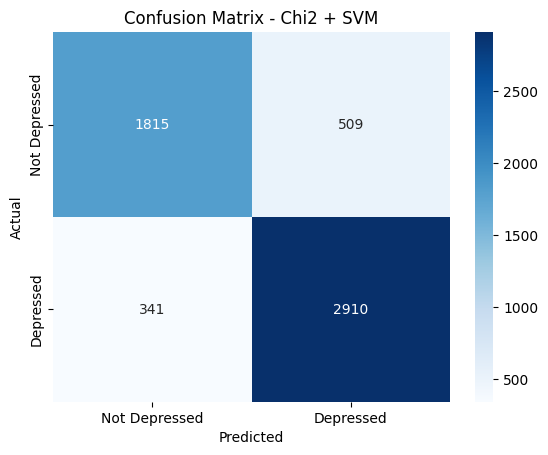

In [27]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
#Chi squared feature selection with SVM


# Prepare data
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']

# Chi2 requires non-negative data → use MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

# Select top 10 features using Chi-Squared test
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')  # You can also try 'rbf'
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate
print("Chi-Squared Feature Selection + SVM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Depressed", "Depressed"],
            yticklabels=["Not Depressed", "Depressed"])
plt.title("Confusion Matrix - Chi2 + SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Embedded Method (L1 Logistic Regression)
Selected features: ['Gender' 'Age' 'City' 'Profession' 'Academic Pressure' 'CGPA'
 'Study Satisfaction' 'Sleep Duration' 'Dietary Habits' 'Degree'
 'Have you ever had suicidal thoughts ?' 'Work/Study Hours'
 'Financial Stress' 'Family History of Mental Illness']
Accuracy: 0.8484304932735426
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2324
           1       0.85      0.89      0.87      3251

    accuracy                           0.85      5575
   macro avg       0.85      0.84      0.84      5575
weighted avg       0.85      0.85      0.85      5575



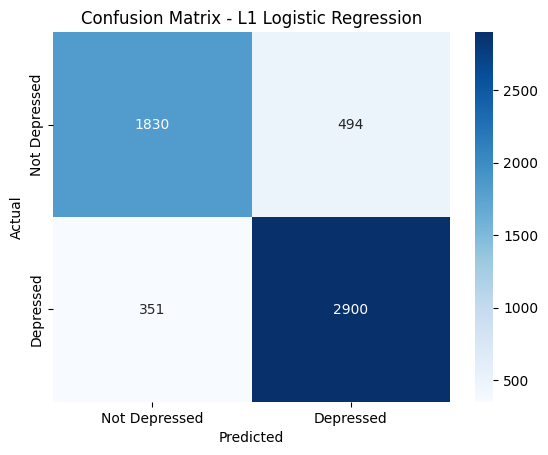

In [28]:
#L1 Lasso regularization with logistic regression

# Prepare data
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']
X_scaled = StandardScaler().fit_transform(X)

# L1 Logistic Regression for feature selection
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_scaled, y)

# Select features where coefficients are non-zero
import numpy as np
selected_mask = model.coef_[0] != 0
X_selected = X_scaled[:, selected_mask]

# Split data using only selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Retrain on selected features
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Embedded Method (L1 Logistic Regression)")
print("Selected features:", np.array(X.columns)[selected_mask])
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Depressed", "Depressed"],
            yticklabels=["Not Depressed", "Depressed"])
plt.title("Confusion Matrix - L1 Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data (assuming X is a pandas DataFrame)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []
remaining_features = list(range(X.shape[1]))
best_accuracy = 0
improved = True

while improved and remaining_features:
    improved = False
    best_candidate = None
    best_candidate_accuracy = best_accuracy

    for feature in remaining_features:
        trial_features = selected_features + [feature]
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train.iloc[:, trial_features], y_train)
        y_pred = model.predict(X_test.iloc[:, trial_features])
        acc = accuracy_score(y_test, y_pred)

        if acc > best_candidate_accuracy:
            best_candidate = feature
            best_candidate_accuracy = acc

    if best_candidate is not None:
        selected_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_accuracy = best_candidate_accuracy
        improved = True
        print(f"Added feature {best_candidate} | Accuracy: {best_accuracy:.4f}")
    else:
        print("No further improvement. Stopping feature selection.")

# Final model
print("\nSelected features:", selected_features)
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train.iloc[:, selected_features], y_train)
final_acc = accuracy_score(y_test, final_model.predict(X_test.iloc[:, selected_features]))
print(f"\nFinal model accuracy with selected features: {final_acc:.4f}")


Added feature 11 | Accuracy: 0.7819
Added feature 4 | Accuracy: 0.8057
Added feature 13 | Accuracy: 0.8282
Added feature 9 | Accuracy: 0.8359
Added feature 6 | Accuracy: 0.8373
Added feature 1 | Accuracy: 0.8423
Added feature 12 | Accuracy: 0.8488
Added feature 8 | Accuracy: 0.8493
No further improvement. Stopping feature selection.

Selected features: [11, 4, 13, 9, 6, 1, 12, 8]

Final model accuracy with selected features: 0.8493


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data (assuming X is a pandas DataFrame and y is your label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = list(range(X.shape[1]))  # Start with all features
best_accuracy = 0
improved = True

# Train with all features to get initial accuracy
model = LogisticRegression(max_iter=1000)
model.fit(X_train.iloc[:, selected_features], y_train)
y_pred = model.predict(X_test.iloc[:, selected_features])
best_accuracy = accuracy_score(y_test, y_pred)

print(f"Initial accuracy with all features: {best_accuracy:.4f}")

# Begin backward elimination
while improved and len(selected_features) > 1:
    improved = False
    worst_feature = None
    best_candidate_accuracy = best_accuracy

    for feature in selected_features:
        trial_features = [f for f in selected_features if f != feature]
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train.iloc[:, trial_features], y_train)
        y_pred = model.predict(X_test.iloc[:, trial_features])
        acc = accuracy_score(y_test, y_pred)

        if acc >= best_candidate_accuracy:
            worst_feature = feature
            best_candidate_accuracy = acc

    if worst_feature is not None:
        selected_features.remove(worst_feature)
        best_accuracy = best_candidate_accuracy
        improved = True
        print(f"Removed feature {worst_feature} | Accuracy: {best_accuracy:.4f}")
    else:
        print("No improvement by removing any more features. Stopping.")

# Final model
print("\nSelected features after backward elimination:", selected_features)
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train.iloc[:, selected_features], y_train)
final_acc = accuracy_score(y_test, final_model.predict(X_test.iloc[:, selected_features]))
print(f"\nFinal model accuracy: {final_acc:.4f}")


Initial accuracy with all features: 0.8484
Removed feature 5 | Accuracy: 0.8497
Removed feature 0 | Accuracy: 0.8499
No improvement by removing any more features. Stopping.

Selected features after backward elimination: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Final model accuracy: 0.8499


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features (good practice for models like logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation using accuracy as the scoring metric
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Output results
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.84089686 0.84932735 0.84484305 0.84627803 0.85076233]
Mean Accuracy: 0.8464
Standard Deviation: 0.0035
